 <h1><center>Film Industry Investment Analysis</center></h1>

<div>
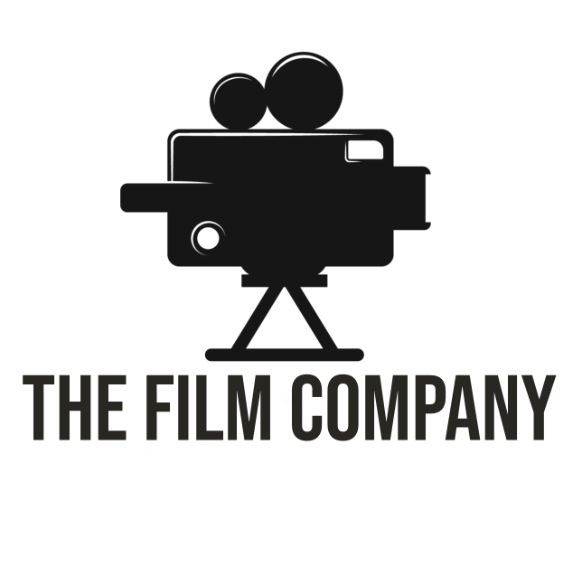
   </div>
<div style="text-align: center;">
<a href="https://www.vecteezy.com/free-vector/film-industry" style="font-size: 6px;">Film Industry Vectors by Vecteezy</a>
</div>

# **Overview**

This project analyzes which types of movies generate the most revenue at the box office. Descriptive analysis of movie data sets collected from Box Office Mojo, IMBD, Rotten Tomatoes, The Movie DB, and The Numbers, will highlight specific movie characteristics that increase ROI such as, studio location, film rating (R, PG, etc), and movie genre. This analysis can be used by the company to decide in which location to build a studio and help the company's new movie studio operate with the lowest risk in their new business endeavor.

# **Business Problem**

<div>
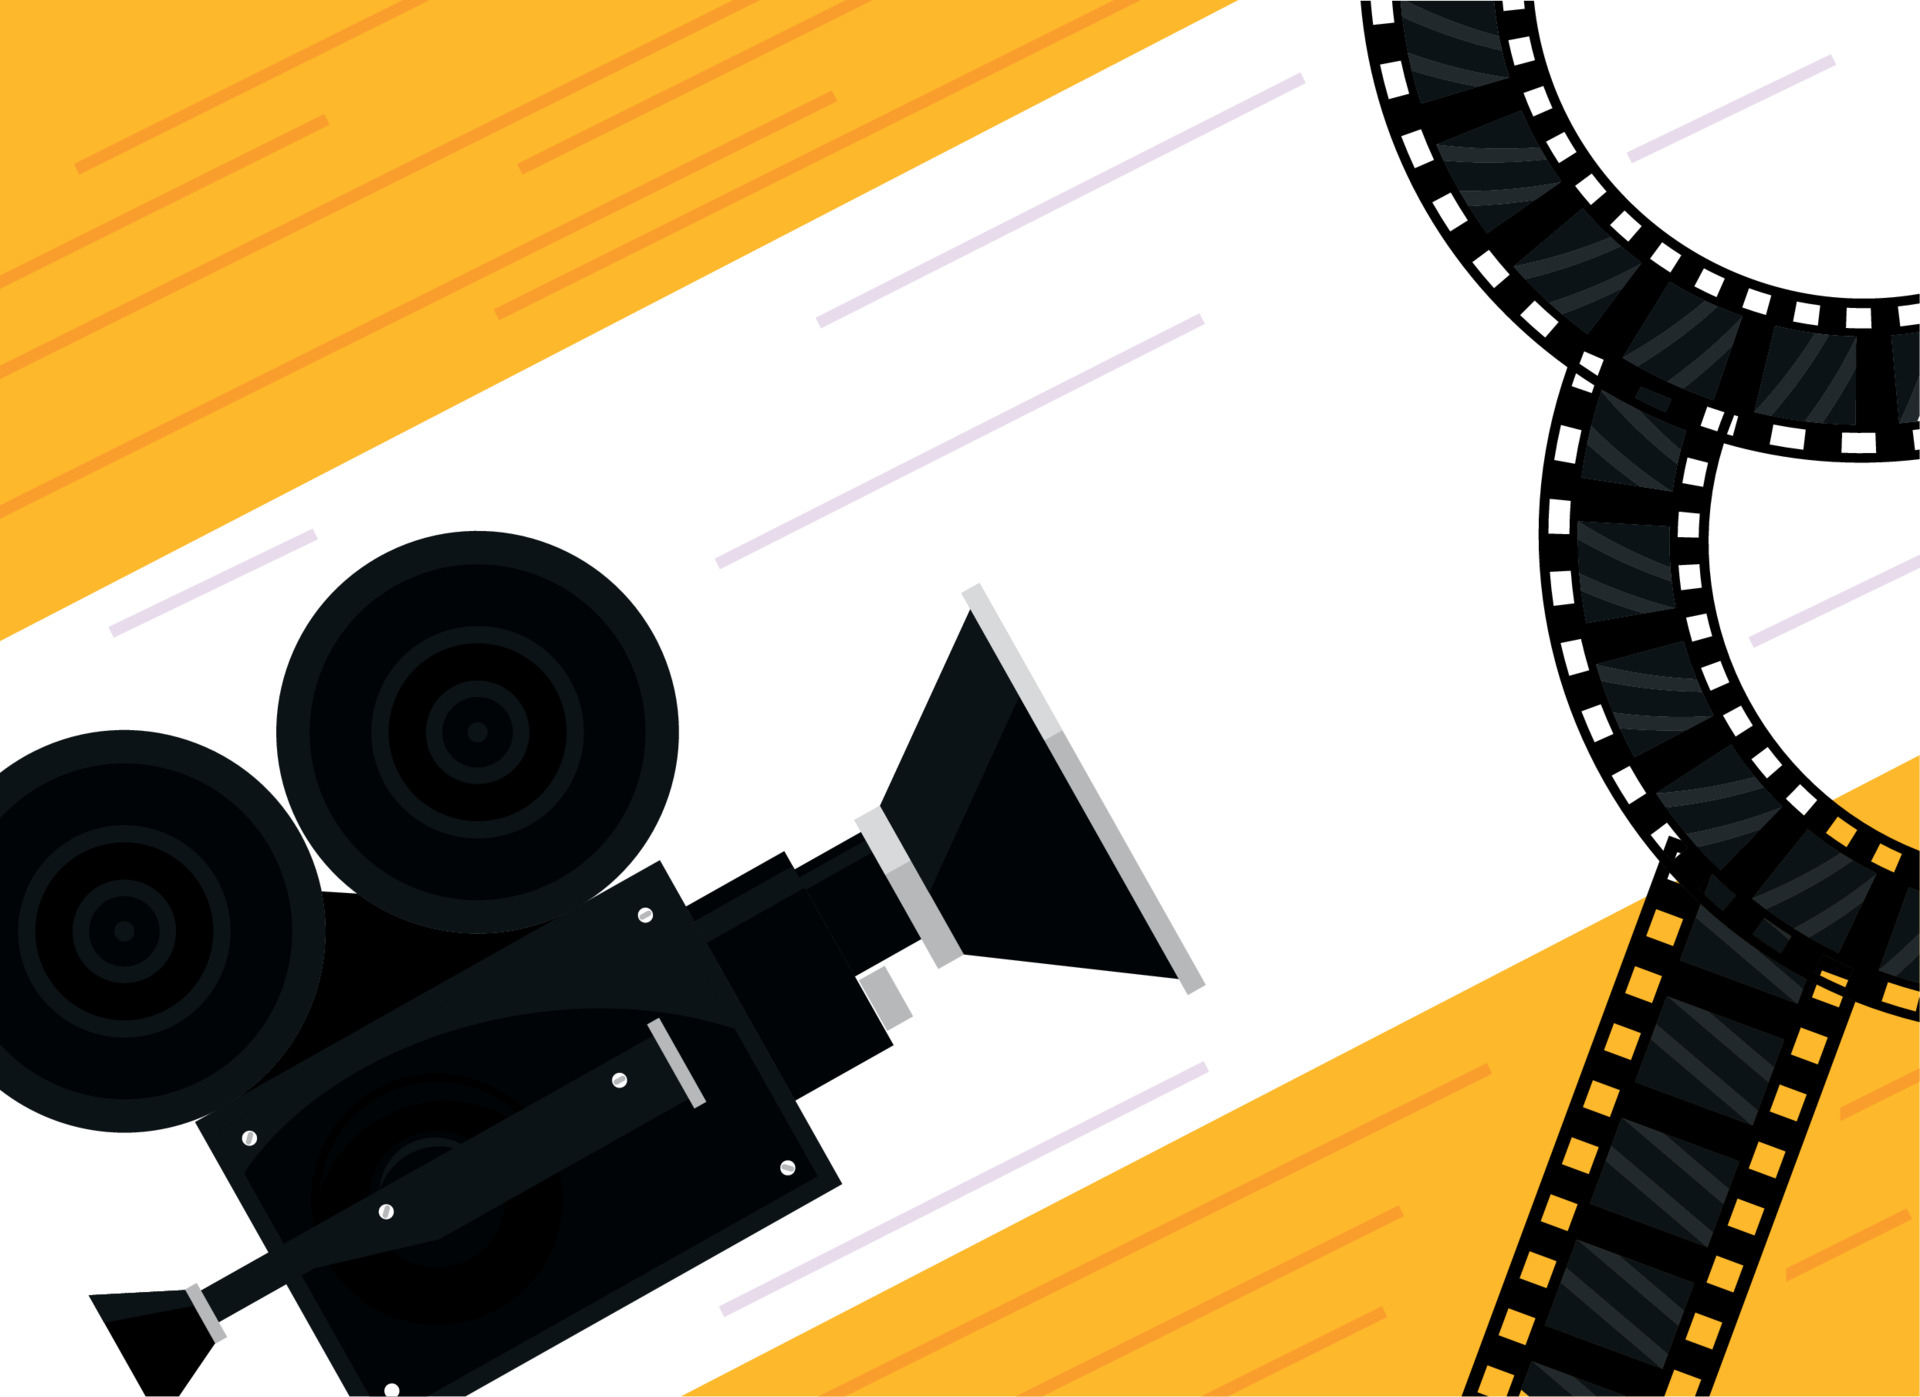
</div>
<div style="text-align: center;">

Analyzing several movie datasets can provide valuable insights that can lead to concrete business recommendations in various aspects of the film industry. When considering characteristics of a successful movie, I analyzed the movie data to identify movies with the greatest return on investment. Based on this analysis, which is explained below, I can recommend       . Furthermore, below are three recommendations based on my analysis:

1. 
2. 
3. 

It's important to note that any business recommendations derived from data analysis should be accompanied by careful consideration of the specific context, legal and regulatory requirements, and limitations of the dataset. Additionally, these recommendations should be subject to ongoing evaluation and refinement based on updated data and emerging industry practices.

# **Data Understanding**

The data has been collected from various locations. Different files have different formats. Some files are compressed CSV (comma-separated values) or TSV (tab-separated values) files that can be opened using spreadsheet software or pd.read_csv, while the data from IMDB is located in a SQLite database.

I have been provided a diagram for the IMDB data and will have to explore the other data to see how they connect to each other and the IMBD data.

<div>
<img src="attachment:IMBD%20data%20diagram.png" width="500"/>
</div>
<div style="text-align: center;">

# **Data Exploration**

In [1]:
# Import the necessary packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sqlite3
#%cd zippedData
conn = sqlite3.connect('Data/im.db')
#database_path = %cd Phase 2 Project/dsc-phase-2-project-v3/zippedData
#conn = sqlite3.connect(database_path'./im.db.zip')

import seaborn as sns
from glob import glob 
#from wordcloud import WordCloud #I may make this type of visualization


#sns.set_theme()
#sns.set_style("ticks", "darkgrid")
#sns.axes_style("ticks")

import cpi

# Fetch the CPI data
#cpi.update()

%matplotlib inline

import functools 
#import reduce


pd.options.display.max_rows =999
pd.options.display.max_columns =999
np.set_printoptions(threshold=np.inf)#no trunkcated lists

There are a number of .csv and.tsv files provided in the zipped folder, I'll use glob to read them in by matching path names.

In [2]:
# Create a list of all csv files using glob
#csv_files = glob('*.csv.gz')
#csv_files

#or should I use iglob to iterate and not load all of the data at once? 
#iglob is a generator? more memory efficient?
csv_files = glob('./Data/*.csv.gz')
for i, file in enumerate(csv_files, 1):
    print(i, file, sep=': ')

1: ./Data/tmdb.movies.csv.gz
2: ./Data/tn.movie_budgets.csv.gz
3: ./Data/bom.movie_gross.csv.gz


Using the Name of the file as the key and and the Pandas Dataframe as the value, I'm creating a dictionary of DataFrames. I can preview all the data by iterrating over the dictionary this way.

In [3]:
# Create a dictionary of DataFrames
csv_dict = {}
for file in csv_files:
    filename = file.split('Data/')[-1].replace('.csv.gz', '').replace('.', '_') # Clean filename
    file_df = pd.read_csv(file) # Create DataFrame
    csv_dict[filename] = file_df # Insert DataFrame into dictionary

In [4]:
# Preview the data
for name, df in csv_dict.items():
    print(name)
    display(df.head()) # Using display instead of print leads to neater formatting in Jupyter Notebook
    print(df.info())
    print('------------------ \n')

tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None
------------------ 

tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None
------------------ 

bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
------------------ 



Again, I'll use the same process for the .tsv files  

In [5]:
# Create a list of all tsv files using glob
tsv_files = glob('./Data/*.tsv.gz')
tsv_files

['./Data/rt.reviews.tsv.gz', './Data/rt.movie_info.tsv.gz']

In [6]:
# Create a dictionary of DataFrames
tsv_dict = {}
for file in tsv_files:
    filename = file.split('Data/')[-1].replace('.tsv.gz', '').replace('.', '_') # Clean filename
    file_df = pd.read_table(file, delimiter = '\t', encoding = 'latin-1') # Create DataFrame
    tsv_dict[filename] = file_df # Insert dataframe into dictionary 

In [7]:
# Preview the data
for name, df in tsv_dict.items():
    print(name)
    print('Total numer of results:', len(name))
    display(df) # Using display instead of print leads to neater formatting in Jupyter Notebook
    print(df.info())
    print('------------------ \n')

rt_reviews
Total numer of results: 10


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None
------------------ 

rt_movie_info
Total numer of results: 13


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None
------------------ 



There are a number of DataFrames. I'll focus my analysis on the data frames that, I think, best answer my questions. 

The first DataFrame which stands out is tn_movie_budgets. This table shows the production budget, domestic and worldwide gross. This financial information will be valuable in exploring the meaning of profit. It will also distinguish which films perfomed best in the box office.

Additional tables that I will explore include: bom_movie_gross (domestic and worldwide profit), rt_movie_info (film rating and studio locations), and tmdb_movies (genre). I'll also be incorporating data from SQL movie_akas(studio location) and movie_basics (genre).

# **Data Preparation**

## Data Cleaning

The request from the investors is to recommend an airplane for them to invest. So this reqires knowing a specific make and model. Addressing missing values in the 'Model' and 'Make' columns requires thoughtful consideration, as these columns are crucial for identifying aircrafts involved in accidents. 

In [8]:
#Clean up 'bom_movie_gross'
movie_gross = csv_dict['bom_movie_gross']
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
#get summary
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


tn_movie_budgets and bom_movie_gross will require that the $ symbol, the comma seperator be removed and the number converted to an integer so it makes sense to define a function and then apply it to the necessary columns to increase efficiency.

In [10]:
# Define function to clean numbers
def numclean(df, col):
    '''
    param1 = Pandas DataFrame
    param2 = Column
    Converts to int type and excludes NaN values
    Returns DataFrame
    '''

    # Convert to numeric, handling NaN values
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')
    
    # Drop rows with NaN values in the specified column
    df = df.dropna(subset=[col])

    return df


In [11]:
# Run function on the three columns
numclean(movie_gross,'foreign_gross')
numclean(movie_gross,'domestic_gross')

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


If I had more time, I'd adjust the figures to account for inflation using the 'cpi' (Consumer Price Index) library. 

code example: import pandas as pd
import cpi

#Load dataset
data = pd.read_csv('bom_movie_gross.csv')

#Define the base year (the year to adjust values from)
base_year = 2010

#Adjust values for inflation
data['Inflation-Adjusted Value'] = cpi.inflate(data['Original Value'], base_year=base_year)

#The adjusted data is now in the 'Inflation-Adjusted Value' column

For now, I'll use the describe.() method to obtain summary statistics and look for anomalies.

In [12]:
movie_gross.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.032000e+03,3387.000000
mean,2.874585e+07,7.505704e+07,2013.958075
std,6.698250e+07,1.375294e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.775000e+06,2012.000000
50%,1.400000e+06,1.890000e+07,2014.000000
75%,2.790000e+07,7.505000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


There aren't any entries here that seem unusual. It's worth noting that the movies in this data base range in year from 2010-2018

In [13]:
#Clean up 'tn_movie_gross'
ww_gross = csv_dict['tn_movie_budgets']
ww_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
#get summary
ww_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [15]:
# See if any duplicates
ww_gross.duplicated().any()

False

In [16]:
# Convert release_date to a datetime object
ww_gross['release_date'] = pd.to_datetime(ww_gross['release_date'])

In [17]:
# Create year column 
ww_gross['year'] = pd.DatetimeIndex(ww_gross['release_date']).year

In [18]:
# Define function to clean numbers
def numclean2(df,col):
    '''
    param1 = Pandas DataFrame
    param2 = Column
    Removes $ symbol, removes ',' seperator and changes to int type
    Returns DataFrame
    '''
    df[col]=df[col].str.replace('$','').str.replace(',','').astype('int')

    return df

In [19]:
numclean2(ww_gross,'worldwide_gross')
numclean2(ww_gross,'domestic_gross')
numclean2(ww_gross,'production_budget')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018
5778,79,1999-04-02,Following,6000,48482,240495,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015


In [20]:
ww_gross.describe()

,id,production_budget,domestic_gross,worldwide_gross,year
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,12.724386
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000


This data table shows entries where the movie gross is zero, that's unusual and I'll dig into that. Additionally, the range of years represented in this data table span from 1915-2020.

In [21]:
ww_gross[ww_gross['domestic_gross']==0]['domestic_gross'].value_counts()

0    548
Name: domestic_gross, dtype: int64

In [22]:
ww_gross[ww_gross['worldwide_gross']==0]['worldwide_gross'].value_counts()

0    367
Name: worldwide_gross, dtype: int64

In [23]:
#explore rows where the gross values are 0
#ww_gross[(ww_gross['domestic_gross']==0) & (ww_gross['worldwide_gross']==0)]
ww_gross[(ww_gross['domestic_gross']==0) | (ww_gross['worldwide_gross']==0)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
194,95,2020-12-31,Moonfall,150000000,0,0,2020
479,80,2017-12-13,Bright,90000000,0,0,2017
480,81,2019-12-31,Army of the Dead,90000000,0,0,2019
535,36,2020-02-21,Call of the Wild,82000000,0,0,2020
617,18,2012-12-31,AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125,2012
619,20,2019-01-22,Renegades,77500000,0,1521672,2019
670,71,2019-08-30,PLAYMOBIL,75000000,0,0,2019
671,72,2019-12-31,355,75000000,0,0,2019
820,21,2018-10-26,Air Strike,65000000,0,516279,2018
951,52,2015-12-11,The Ridiculous 6,60000000,0,0,2015


In [24]:
len(ww_gross[(ww_gross['domestic_gross']==0) | (ww_gross['worldwide_gross']==0)])

548

There are 181 instances where the domestic gross is zero and the worldwide gross has a value. Some movies may have staggered release dates, may not be released in the USA, or simply the data was never entered and so there may not be values avaiable for every entry.

Further investigation could continue, but I will join these two data sets and then proceed to drop any data that still contains a zero value for the gross revenue.

## Joining the data frames

Before anything else can be done to this data it's important to combine like data. For the purposes of value counts, the data entry needs to be standardized. 

In [25]:
#Create variables for dictionaries 
rt_movie_info = tsv_dict['rt_movie_info']
tmdb_movies = csv_dict['tmdb_movies']

In [26]:
# Print columns for tmdb_movies data frame
print('Columns in tmdb_movies:')
print(tmdb_movies.columns)

# Print columns for tn_movie_budgets data frame
print('Columns in ww_gross:')
print(ww_gross.columns)

# Print columns for bom_movie_gross data frame
print('Columns in movie_gross:')
print(movie_gross.columns)

Columns in tmdb_movies:
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
Columns in ww_gross:
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'year'],
      dtype='object')
Columns in movie_gross:
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [27]:
# Rename columns in ww_gross DataFrame
ww_gross = ww_gross.rename(columns={'movie': 'title'})

In [28]:
print(movie_gross.columns)
print(ww_gross.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'year'],
      dtype='object')


In [29]:
# Join the DataFrames using an 'outer' join to include all rows from both DataFrames
merged_df = pd.merge(movie_gross, ww_gross, on=['title', 'year'], how='outer')
merged_df

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,47.0,2010-06-18,200000000.0,415004880.0,1.068880e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,NaN,NaT,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,NaN,NaT,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000.0,2010,38.0,2010-07-16,160000000.0,292576195.0,8.355246e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,27.0,2010-05-21,165000000.0,238736787.0,7.562447e+08
...,...,...,...,...,...,...,...,...,...,...
7949,Red 11,NaN,NaN,NaN,2018,78.0,2018-12-31,7000.0,0.0,0.000000e+00
7950,Following,NaN,NaN,NaN,1999,79.0,1999-04-02,6000.0,48482.0,2.404950e+05
7951,Return to the Land of Wonders,NaN,NaN,NaN,2005,80.0,2005-07-13,5000.0,1338.0,1.338000e+03
7952,A Plague So Pleasant,NaN,NaN,NaN,2015,81.0,2015-09-29,1400.0,0.0,0.000000e+00


In [30]:
merged_df[merged_df.duplicated(['title'], keep=False)].sort_values(by=['title'])

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
6608,"20,000 Leagues Under the Sea",NaN,NaN,NaN,1954,71.0,1954-12-23,5000000.0,28200000.0,2.820000e+07
7792,"20,000 Leagues Under the Sea",NaN,NaN,NaN,1916,15.0,1916-12-24,200000.0,8000000.0,8.000000e+06
2435,A Monster Calls,Focus,3700000.0,43600000.0,2016,NaN,NaT,NaN,NaN,NaN
4329,A Monster Calls,NaN,NaN,NaN,2017,41.0,2017-01-06,43000000.0,3740823.0,4.641453e+07
7239,A Nightmare on Elm Street,NaN,NaN,NaN,1984,17.0,1984-11-09,1800000.0,25504513.0,2.550451e+07
4551,A Nightmare on Elm Street,NaN,NaN,NaN,2010,49.0,2010-04-30,35000000.0,63075011.0,1.177296e+08
4834,Aladdin,NaN,NaN,NaN,1992,33.0,1992-11-11,28000000.0,217350219.0,5.040502e+08
3419,Aladdin,NaN,NaN,NaN,2019,81.0,2019-05-24,182000000.0,246734314.0,6.192343e+08
924,Albert Nobbs,RAtt.,3000000.0,2600000.0,2012,NaN,NaT,NaN,NaN,NaN
6353,Albert Nobbs,NaN,NaN,NaN,2011,67.0,2011-12-21,7500000.0,3014696.0,8.539003e+06


In [31]:
# Convert release_date to a datetime object
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])

# Fill NaN or 0.0 cells in column domestic_gross_y with value from domestic_gross_x
merged_df['domestic_gross_y'].fillna(merged_df['domestic_gross_x'], inplace=True)

# Drop the 'domestic_gross_x' column
merged_df.drop(columns=['domestic_gross_x'], inplace=True)

# Rename 'domestic_gross_y' to 'domestic_gross'
merged_df.rename(columns={'domestic_gross_y': 'domestic_gross'}, inplace=True)

merged_df

,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000.0,2010,47.0,2010-06-18,200000000.0,415004880.0,1.068880e+09
1,Alice in Wonderland (2010),BV,691300000.0,2010,NaN,NaT,NaN,334200000.0,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,664300000.0,2010,NaN,NaT,NaN,296000000.0,NaN
3,Inception,WB,535700000.0,2010,38.0,2010-07-16,160000000.0,292576195.0,8.355246e+08
4,Shrek Forever After,P/DW,513900000.0,2010,27.0,2010-05-21,165000000.0,238736787.0,7.562447e+08
...,...,...,...,...,...,...,...,...,...
7949,Red 11,NaN,NaN,2018,78.0,2018-12-31,7000.0,0.0,0.000000e+00
7950,Following,NaN,NaN,1999,79.0,1999-04-02,6000.0,48482.0,2.404950e+05
7951,Return to the Land of Wonders,NaN,NaN,2005,80.0,2005-07-13,5000.0,1338.0,1.338000e+03
7952,A Plague So Pleasant,NaN,NaN,2015,81.0,2015-09-29,1400.0,0.0,0.000000e+00


In [32]:
# Convert release_date to a datetime object
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])

# Create year column 
#ww_gross['year'] = pd.DatetimeIndex(ww_gross['release_date']).year

# Rename columns in tn_movie_budgets DataFrame
#ww_gross = ww_gross.rename(columns={'movie': 'title'})

#but does this move over any date from the 'release date' column to the 
#year column?

merged_df

,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000.0,2010,47.0,2010-06-18,200000000.0,415004880.0,1.068880e+09
1,Alice in Wonderland (2010),BV,691300000.0,2010,NaN,NaT,NaN,334200000.0,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,664300000.0,2010,NaN,NaT,NaN,296000000.0,NaN
3,Inception,WB,535700000.0,2010,38.0,2010-07-16,160000000.0,292576195.0,8.355246e+08
4,Shrek Forever After,P/DW,513900000.0,2010,27.0,2010-05-21,165000000.0,238736787.0,7.562447e+08
...,...,...,...,...,...,...,...,...,...
7949,Red 11,NaN,NaN,2018,78.0,2018-12-31,7000.0,0.0,0.000000e+00
7950,Following,NaN,NaN,1999,79.0,1999-04-02,6000.0,48482.0,2.404950e+05
7951,Return to the Land of Wonders,NaN,NaN,2005,80.0,2005-07-13,5000.0,1338.0,1.338000e+03
7952,A Plague So Pleasant,NaN,NaN,2015,81.0,2015-09-29,1400.0,0.0,0.000000e+00


In [33]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [34]:
# Create year column 
tmdb_movies['year'] = pd.DatetimeIndex(tmdb_movies['release_date']).year

tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018


In [35]:
merged_df2 = pd.merge(merged_df, tmdb_movies, on=['title', 'year'], how='outer')
merged_df2

,title,studio,foreign_gross,year,id_x,release_date_x,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,Toy Story 3,BV,652000000.0,2010,47.0,2010-06-18,200000000.0,415004880.0,1.068880e+09,7.0,"[16, 10751, 35]",10193.0,en,Toy Story 3,24.445,2010-06-17,7.7,8340.0
1,Alice in Wonderland (2010),BV,691300000.0,2010,NaN,NaT,NaN,334200000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,664300000.0,2010,NaN,NaT,NaN,296000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,535700000.0,2010,38.0,2010-07-16,160000000.0,292576195.0,8.355246e+08,4.0,"[28, 878, 12]",27205.0,en,Inception,27.920,2010-07-16,8.3,22186.0
4,Shrek Forever After,P/DW,513900000.0,2010,27.0,2010-05-21,165000000.0,238736787.0,7.562447e+08,38.0,"[35, 12, 14, 16, 10751]",10192.0,en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31890,Laboratory Conditions,NaN,NaN,2018,NaN,NaT,NaN,NaN,NaN,26512.0,"[27, 18]",488143.0,en,Laboratory Conditions,0.600,2018-10-13,0.0,1.0
31891,_EXHIBIT_84xxx_,NaN,NaN,2018,NaN,NaT,NaN,NaN,NaN,26513.0,"[18, 53]",485975.0,en,_EXHIBIT_84xxx_,0.600,2018-05-01,0.0,1.0
31892,The Last One,NaN,NaN,2018,NaN,NaT,NaN,NaN,NaN,26514.0,"[14, 28, 12]",381231.0,en,The Last One,0.600,2018-10-01,0.0,1.0
31893,Trailer Made,NaN,NaN,2018,NaN,NaT,NaN,NaN,NaN,26515.0,"[10751, 12, 28]",366854.0,en,Trailer Made,0.600,2018-06-22,0.0,1.0


In [36]:
# Convert release_date to a datetime object
#merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])

# Fill NaN or 0.0 cells in column release_date_y with value from release_date_x
merged_df2['release_date_y'].fillna(merged_df2['release_date_x'], inplace=True)

# Drop the 'release_date_x' column
merged_df2.drop(columns=['release_date_x'], inplace=True)

# Rename 'release_date_y' to 'release_date'
merged_df2.rename(columns={'release_date_y': 'release_date'}, inplace=True)

# Drop the 'id_x and _y columns' columns
merged_df2.drop(columns=['id_x', 'id_y', 'Unnamed: 0'], inplace=True)

#merged_df2.drop_duplicates()

merged_df2

,title,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,652000000.0,2010,200000000.0,415004880.0,1.068880e+09,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340.0
1,Alice in Wonderland (2010),BV,691300000.0,2010,NaN,334200000.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,664300000.0,2010,NaN,296000000.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,Inception,WB,535700000.0,2010,160000000.0,292576195.0,8.355246e+08,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0
4,Shrek Forever After,P/DW,513900000.0,2010,165000000.0,238736787.0,7.562447e+08,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31890,Laboratory Conditions,NaN,NaN,2018,NaN,NaN,NaN,"[27, 18]",en,Laboratory Conditions,0.600,2018-10-13,0.0,1.0
31891,_EXHIBIT_84xxx_,NaN,NaN,2018,NaN,NaN,NaN,"[18, 53]",en,_EXHIBIT_84xxx_,0.600,2018-05-01,0.0,1.0
31892,The Last One,NaN,NaN,2018,NaN,NaN,NaN,"[14, 28, 12]",en,The Last One,0.600,2018-10-01,0.0,1.0
31893,Trailer Made,NaN,NaN,2018,NaN,NaN,NaN,"[10751, 12, 28]",en,Trailer Made,0.600,2018-06-22,0.0,1.0


In [37]:
# Drop the 'domestic_gross_x' column
#merged_df2.drop(columns=['id_x', 'id_y', 'release_date_x', 'release_date_y', 'Unnamed: 0'], inplace=True)

#merged_df2

In [38]:
# Adjust $ columns for inflation using CPI
columns_to_adjust = ['worldwide_gross', 'domestic_gross', 'foreign_gross', 'production_budget']

for column in columns_to_adjust:
    merged_df2[f'cpi_{column}'] = merged_df2.apply(lambda row: cpi.inflate(row[column], row['year']), axis=1)

#merged_df2['cpi_adjusted_worldwide_gross'] = merged_df2.apply(lambda row: cpi.inflate(row['worldwide_gross'], row['year']), axis=1)

merged_df2

,title,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget
0,Toy Story 3,BV,652000000.0,2010,200000000.0,415004880.0,1.068880e+09,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340.0,1.434553e+09,5.569819e+08,8.750553e+08,2.684219e+08
1,Alice in Wonderland (2010),BV,691300000.0,2010,NaN,334200000.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,4.485330e+08,9.278002e+08,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,664300000.0,2010,NaN,296000000.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,3.972644e+08,8.915633e+08,NaN
3,Inception,WB,535700000.0,2010,160000000.0,292576195.0,8.355246e+08,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0,1.121365e+09,3.926693e+08,7.189680e+08,2.147375e+08
4,Shrek Forever After,P/DW,513900000.0,2010,165000000.0,238736787.0,7.562447e+08,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0,1.014963e+09,3.204109e+08,6.897100e+08,2.214480e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31890,Laboratory Conditions,NaN,NaN,2018,NaN,NaN,NaN,"[27, 18]",en,Laboratory Conditions,0.600,2018-10-13,0.0,1.0,NaN,NaN,NaN,NaN
31891,_EXHIBIT_84xxx_,NaN,NaN,2018,NaN,NaN,NaN,"[18, 53]",en,_EXHIBIT_84xxx_,0.600,2018-05-01,0.0,1.0,NaN,NaN,NaN,NaN
31892,The Last One,NaN,NaN,2018,NaN,NaN,NaN,"[14, 28, 12]",en,The Last One,0.600,2018-10-01,0.0,1.0,NaN,NaN,NaN,NaN
31893,Trailer Made,NaN,NaN,2018,NaN,NaN,NaN,"[10751, 12, 28]",en,Trailer Made,0.600,2018-06-22,0.0,1.0,NaN,NaN,NaN,NaN


In [39]:
#Display CPI values as integers

#merged_df2['cpi_worldwide_gross'] = merged_df2['cpi_worldwide_gross'].apply(lambda x: f'{x:.0f}')
#merged_df2['cpi_domestic_gross'] = merged_df2['cpi_domestic_gross'].apply(lambda x: f'{x:.0f}')
#merged_df2['cpi_foreign_gross'] = merged_df2['cpi_foreign_gross'].apply(lambda x: f'{x:.0f}')
#merged_df2['cpi_production_budget'] = merged_df2['cpi_production_budget'].apply(lambda x: f'{x:.0f}')

#merged_df2['cpi_adjusted_worldwide_gross'] = merged_df2['cpi_adjusted_worldwide_gross'].apply(lambda x: f'{x:.0f}')
merged_df2

,title,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget
0,Toy Story 3,BV,652000000.0,2010,200000000.0,415004880.0,1.068880e+09,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340.0,1.434553e+09,5.569819e+08,8.750553e+08,2.684219e+08
1,Alice in Wonderland (2010),BV,691300000.0,2010,NaN,334200000.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,4.485330e+08,9.278002e+08,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,664300000.0,2010,NaN,296000000.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,3.972644e+08,8.915633e+08,NaN
3,Inception,WB,535700000.0,2010,160000000.0,292576195.0,8.355246e+08,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0,1.121365e+09,3.926693e+08,7.189680e+08,2.147375e+08
4,Shrek Forever After,P/DW,513900000.0,2010,165000000.0,238736787.0,7.562447e+08,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0,1.014963e+09,3.204109e+08,6.897100e+08,2.214480e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31890,Laboratory Conditions,NaN,NaN,2018,NaN,NaN,NaN,"[27, 18]",en,Laboratory Conditions,0.600,2018-10-13,0.0,1.0,NaN,NaN,NaN,NaN
31891,_EXHIBIT_84xxx_,NaN,NaN,2018,NaN,NaN,NaN,"[18, 53]",en,_EXHIBIT_84xxx_,0.600,2018-05-01,0.0,1.0,NaN,NaN,NaN,NaN
31892,The Last One,NaN,NaN,2018,NaN,NaN,NaN,"[14, 28, 12]",en,The Last One,0.600,2018-10-01,0.0,1.0,NaN,NaN,NaN,NaN
31893,Trailer Made,NaN,NaN,2018,NaN,NaN,NaN,"[10751, 12, 28]",en,Trailer Made,0.600,2018-06-22,0.0,1.0,NaN,NaN,NaN,NaN


In [40]:
#how many rows have a worldwide_gross of 0?
len(merged_df2[merged_df2['cpi_worldwide_gross']== 0])




#Drop rows with zero money values
#merged_df2 = merged_df2[merged_df2['production_budget'] > 0.0]

#merged_df2

#example
#Drop rows with zero number of passengers; eliminate future NaN values
#aviation_data_built = aviation_data_clean[aviation_data_clean['Total.Fatal.Injuries'] + aviation_data_clean['Total.Serious.Injuries'] + aviation_data_clean['Total.Minor.Injuries'] + aviation_data_clean['Total.Uninjured'] > 0.0]


370

In [41]:
#For some movies, we note the release_date is in the future and as such 
#it is normal that the worldwide gross is unavailable. 
#For others we could investigate futher by researching the titles. 
#However as the number of such entries is small compare to the whole dataset, 
#we have chosen to remove these rows.

#should I be only keeping rows where the WW gross is not zero?

# Replace zero values in the worldwide gross with NaN
#merged_df2['cpi_worldwide_gross'].replace(0, np.nan, inplace=True)

# Replace NaN values in the worldwide gross with 0
merged_df2['cpi_worldwide_gross'].replace(np.nan, 0, inplace=True)

#Keep only rows where worldwide_gross is non-zero
merged_df2 = merged_df2[merged_df2['cpi_worldwide_gross'] != 0]

#Reset index
merged_df2 = merged_df2.reset_index(drop = True)

#View first 5 rows
print('Total number of results:', len(merged_df2))
merged_df2.head()

Total number of results: 5570


,title,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget
0,Toy Story 3,BV,652000000.0,2010,200000000.0,415004880.0,1.068880e+09,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340.0,1.434553e+09,5.569819e+08,8.750553e+08,2.684219e+08
1,Inception,WB,535700000.0,2010,160000000.0,292576195.0,8.355246e+08,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0,1.121365e+09,3.926693e+08,7.189680e+08,2.147375e+08
2,Shrek Forever After,P/DW,513900000.0,2010,165000000.0,238736787.0,7.562447e+08,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0,1.014963e+09,3.204109e+08,6.897100e+08,2.214480e+08
3,The Twilight Saga: Eclipse,Sum.,398000000.0,2010,68000000.0,300531751.0,7.061028e+08,"[12, 14, 18, 10749]",en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909.0,9.476672e+08,4.033465e+08,5.341595e+08,9.126344e+07
4,Iron Man 2,Par.,311500000.0,2010,170000000.0,312433331.0,6.211564e+08,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,6.8,12368.0,8.336598e+08,4.193197e+08,4.180671e+08,2.281586e+08


# Extract SQLite Tables to Pandas dataframe

In [42]:
table_names = ['movie_basics', 'movie_akas', 'writers', 'directors', 'persons']

# Create an empty dictionary to store DataFrames
SQL_dataframes = {}

# Loop through table names and read data into DataFrames
for table in table_names:
    sql_query = f'SELECT * FROM {table}'
    SQL_dataframes[table] = pd.read_sql(sql_query, conn)


In [43]:
# Preview the data from SQL DataFrames
for name, df in SQL_dataframes.items():
    print(name)
    print('Total number of results:', len(df))
    display(df)  # Using display instead of print leads to neater formatting in Jupyter Notebook
    print(df.info())
    print('------------------ \n')


movie_basics
Total number of results: 146144


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
------------------ 

movie_akas
Total number of results: 331703


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None
------------------ 

writers
Total number of results: 255873


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB
None
------------------ 

directors
Total number of results: 291174


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
None
------------------ 

persons
Total number of results: 606648


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
None
------------------ 



In [44]:
# Access the 'movie_basics' DataFrame from the SQL_dataframes dictionary
movie_basics_df = SQL_dataframes['movie_basics']

# Create a copy of the DataFrame to avoid altering the original
movie_basics_ga = movie_basics_df.copy()

# Now I can continue working with 'movie_basics_copy'
# Split the genres into separate rows and create a new 'genre' column
movie_basics_ga['genre'] = movie_basics_ga['genres'].str.split(',')

# Explode the 'genre' column to create new rows for each genre
movie_basics_ga = movie_basics_ga.explode('genre')

# Display the updated DataFrame
movie_basics_ga.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Drama


## Genre Analysis

In [45]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  5570 non-null   object 
 1   studio                 1323 non-null   object 
 2   foreign_gross          1155 non-null   float64
 3   year                   5570 non-null   int64  
 4   production_budget      5570 non-null   float64
 5   domestic_gross         5570 non-null   float64
 6   worldwide_gross        5570 non-null   float64
 7   genre_ids              1655 non-null   object 
 8   original_language      1655 non-null   object 
 9   original_title         1655 non-null   object 
 10  popularity             1655 non-null   float64
 11  release_date           5570 non-null   object 
 12  vote_average           1655 non-null   float64
 13  vote_count             1655 non-null   float64
 14  cpi_worldwide_gross    5570 non-null   float64
 15  cpi_

In [46]:
movie_basics_ga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234958 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         234958 non-null  object 
 1   primary_title    234958 non-null  object 
 2   original_title   234937 non-null  object 
 3   start_year       234958 non-null  int64  
 4   runtime_minutes  195904 non-null  float64
 5   genres           229550 non-null  object 
 6   genre            229550 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 14.3+ MB


In [47]:
# Merge the DataFrames on 'original_title' and 'start_year' in 'movie_basics_ga' with 'title' and 'year' in 'merged_df2'
genre_analysis = pd.merge(
    movie_basics_ga, 
    merged_df2, 
    left_on=['primary_title', 'start_year'], 
    right_on=['title', 'year'], 
    how='outer'
).drop_duplicates()



print('Total number of results:', len(genre_analysis))
genre_analysis

Total number of results: 239045


,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,genre,title,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title_y,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",Biography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavite,NaN,NaN,2006.0,7000.0,70071.0,71644.0,NaN,NaN,NaN,NaN,2006-05-26 00:00:00,NaN,NaN,104002.851290,101719.387426,NaN,10161.631944
239372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Mongol King,NaN,NaN,2004.0,7000.0,900.0,900.0,NaN,NaN,NaN,NaN,2004-12-31 00:00:00,NaN,NaN,1394.332980,1394.332980,NaN,10844.812070
239373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Following,NaN,NaN,1999.0,6000.0,48482.0,240495.0,NaN,NaN,NaN,NaN,1999-04-02 00:00:00,NaN,NaN,422461.369898,85165.064286,NaN,10539.795918
239374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Return to the Land of Wonders,NaN,NaN,2005.0,5000.0,1338.0,1338.0,NaN,NaN,NaN,NaN,2005-07-13 00:00:00,NaN,NaN,2004.978955,2004.978955,NaN,7492.447517


In [48]:
# Fill NaN or 0.0 cells in column original_title_x with value from original_title_y
genre_analysis['original_title_x'].fillna(genre_analysis['original_title_y'], inplace=True)

# Drop the 'title' column
genre_analysis.drop(columns=['original_title_y'], inplace=True)

# Rename 'original_title_x' to 'original_title'
genre_analysis.rename(columns={'original_title_x': 'original_title'}, inplace=True)

# Fill NaN or 0.0 cells in column start_year with value from year
genre_analysis['start_year'].fillna(genre_analysis['year'], inplace=True)

# Drop the 'year' column
genre_analysis.drop(columns=['year'], inplace=True)

# Rename 'start_year' to 'years'
genre_analysis.rename(columns={'start_year': 'release_year'}, inplace=True)
genre_analysis

,movie_id,primary_title,original_title,release_year,runtime_minutes,genres,genre,title,studio,foreign_gross,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",Biography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239371,NaN,NaN,NaN,2006.0,NaN,NaN,NaN,Cavite,NaN,NaN,7000.0,70071.0,71644.0,NaN,NaN,NaN,2006-05-26 00:00:00,NaN,NaN,104002.851290,101719.387426,NaN,10161.631944
239372,NaN,NaN,NaN,2004.0,NaN,NaN,NaN,The Mongol King,NaN,NaN,7000.0,900.0,900.0,NaN,NaN,NaN,2004-12-31 00:00:00,NaN,NaN,1394.332980,1394.332980,NaN,10844.812070
239373,NaN,NaN,NaN,1999.0,NaN,NaN,NaN,Following,NaN,NaN,6000.0,48482.0,240495.0,NaN,NaN,NaN,1999-04-02 00:00:00,NaN,NaN,422461.369898,85165.064286,NaN,10539.795918
239374,NaN,NaN,NaN,2005.0,NaN,NaN,NaN,Return to the Land of Wonders,NaN,NaN,5000.0,1338.0,1338.0,NaN,NaN,NaN,2005-07-13 00:00:00,NaN,NaN,2004.978955,2004.978955,NaN,7492.447517


In [49]:
# Group by 'genre' and sum the 'worldwide_gross' column
genre_summary = genre_analysis.groupby('genre')['cpi_worldwide_gross'].sum().reset_index()

# Sort the summary by 'worldwide_gross' in descending order
genre_summary = genre_summary.sort_values('cpi_worldwide_gross', ascending=False)

# Display the summary
genre_summary

,genre,cpi_worldwide_gross
2,Adventure,1.541951e+11
0,Action,1.327480e+11
5,Comedy,8.582057e+10
8,Drama,6.725252e+10
20,Sci-Fi,5.650425e+10
3,Animation,4.751405e+10
10,Fantasy,4.052046e+10
24,Thriller,3.765509e+10
9,Family,2.411805e+10
6,Crime,2.356171e+10


In [50]:
# Convert 'cpi_worldwide_gross' to numeric format
#genre_analysis['cpi_worldwide_gross'] = pd.to_numeric(genre_analysis['cpi_worldwide_gross'], errors='coerce')

# Drop rows with NaN values in 'cpi_worldwide_gross'
#genre_analysis = genre_analysis.dropna(subset=['cpi_worldwide_gross'])

# Group by 'genre' and sum the 'cpi_worldwide_gross' column
#genre_summary = genre_analysis.groupby('genre')['cpi_worldwide_gross'].sum().reset_index()

# Sort the summary by 'cpi_worldwide_gross' in descending order
#genre_summary = genre_summary.sort_values('cpi_worldwide_gross', ascending=False)

#genre_summary.reset_index(inplace=True)

# Display the summary
#genre_summary

In [51]:
#genre_summary.reset_index(inplace=True)
#genre_summary.drop("level_0" axis=1, inplace=True)
#genre_summary

In [52]:
!pip install inflect

import locale
import inflect

# Set the locale for formatting numbers
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Function to format numbers in both numeric and word format
def format_numbers(num):
    # Format number in numeric format
    num_formatted = locale.format_string('%.0f', num, grouping=True)
    
    # Convert number to words
    p = inflect.engine()
    num_words = p.number_to_words(int(num)).replace('-', ' ')
    
    return num_formatted, num_words

# Apply the function to the 'worldwide_gross' column
genre_summary['numeric_format'], genre_summary['word_format'] = zip(*genre_summary['cpi_worldwide_gross'].map(format_numbers))

# Display the updated summary
genre_summary


,genre,cpi_worldwide_gross,numeric_format,word_format
2,Adventure,1.541951e+11,"154,195,149,322","one hundred and fifty four billion, one hundre..."
0,Action,1.327480e+11,"132,748,016,241","one hundred and thirty two billion, seven hund..."
5,Comedy,8.582057e+10,"85,820,569,994","eighty five billion, eight hundred and twenty ..."
8,Drama,6.725252e+10,"67,252,520,392","sixty seven billion, two hundred and fifty two..."
20,Sci-Fi,5.650425e+10,"56,504,254,356","fifty six billion, five hundred and four milli..."
3,Animation,4.751405e+10,"47,514,048,933","forty seven billion, five hundred and fourteen..."
10,Fantasy,4.052046e+10,"40,520,455,965","forty billion, five hundred and twenty million..."
24,Thriller,3.765509e+10,"37,655,086,744","thirty seven billion, six hundred and fifty fi..."
9,Family,2.411805e+10,"24,118,054,226","twenty four billion, one hundred and eighteen ..."
6,Crime,2.356171e+10,"23,561,710,308","twenty three billion, five hundred and sixty o..."


INSERT VISUALIZATION HERE

## Profit and Profit Margin

The value of this venture relies on making a profit on the investment. Due to multiple revenue streams, it's challenging to understand whether or not a box office movie is ultimately profitable - and to whom. There is an abundance of information that takes careful consideration, in context, to interpret meaningfully. 

There are a number of factors to consider such as:
1. opening weekend ranking
2. percentage drop between the first and second weekends
3. production budget:gross profit difference
4. movie advertising (promotional budget)
5. percentage studio revenue
6. percentage theater revenue
7. foreign vs domestic gross profit
8. DVD/video-on-demand releases

For both a precise and accurate analysis, a concrete understanding of which variables the company would be owning would be needed. Due to the lack of detailed financial data available publically around movie profitability, this project will share a simplified analysis model based on publically available data.

In this analysis*, profit is defined as follows:
profit = worldwide gross revenue - production budget
profit margin is defined to be:

profit margin = (worldwide gross revenue - production budget) / worldwide gross revenue

* all values in this analysis have been adjusted for inflation for accurate comparison.

In [53]:
#

In [54]:
# Use plain formatting to remove scientific notation
merged_df2['cpi_worldwide_gross'] = pd.to_numeric(merged_df2['cpi_worldwide_gross'], errors='coerce')
merged_df2['cpi_production_budget'] = pd.to_numeric(merged_df2['cpi_production_budget'], errors='coerce')
merged_df2['cpi_foreign_gross'] = pd.to_numeric(merged_df2['cpi_foreign_gross'], errors='coerce')
merged_df2['cpi_domestic_gross'] = pd.to_numeric(merged_df2['cpi_domestic_gross'], errors='coerce')

# Create ww_profit column
merged_df2['ww_profit'] = merged_df2.apply(lambda x: (x['cpi_worldwide_gross']) - (x['cpi_production_budget']), axis = 1)

# Get summary statistics for profit
merged_df2['ww_profit'].describe().apply(lambda x: format(x, 'f'))

count          5570.000000
mean      110258363.001813
std       280793679.515937
min      -229215509.298591
25%        -2676971.439565
50%        21123880.298370
75%       111868996.784039
max      8140129177.320863
Name: ww_profit, dtype: object

Profit and loss amounts vary ranging from approximately (in US Dollars) 200 million in losses to 8 billion in profits. The median indicates a movie profit of approximately 21 million.

In [55]:
# Create profit or loss column
#movies['profitorloss'] = movies['profit'].map(lambda x : 'Profit' if x >=0 else 'Loss')

merged_df2=merged_df2.drop_duplicates()


In [56]:
merged_df2

,title,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget,ww_profit
0,Toy Story 3,BV,652000000.0,2010,200000000.0,415004880.0,1.068880e+09,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340.0,1.434553e+09,5.569819e+08,8.750553e+08,2.684219e+08,1.166131e+09
1,Inception,WB,535700000.0,2010,160000000.0,292576195.0,8.355246e+08,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0,1.121365e+09,3.926693e+08,7.189680e+08,2.147375e+08,9.066279e+08
2,Shrek Forever After,P/DW,513900000.0,2010,165000000.0,238736787.0,7.562447e+08,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0,1.014963e+09,3.204109e+08,6.897100e+08,2.214480e+08,7.935150e+08
3,The Twilight Saga: Eclipse,Sum.,398000000.0,2010,68000000.0,300531751.0,7.061028e+08,"[12, 14, 18, 10749]",en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909.0,9.476672e+08,4.033465e+08,5.341595e+08,9.126344e+07,8.564038e+08
4,Iron Man 2,Par.,311500000.0,2010,170000000.0,312433331.0,6.211564e+08,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,6.8,12368.0,8.336598e+08,4.193197e+08,4.180671e+08,2.281586e+08,6.055012e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,Cavite,NaN,NaN,2006,7000.0,70071.0,7.164400e+04,NaN,NaN,NaN,NaN,2006-05-26 00:00:00,NaN,NaN,1.040029e+05,1.017194e+05,NaN,1.016163e+04,9.384122e+04
5566,The Mongol King,NaN,NaN,2004,7000.0,900.0,9.000000e+02,NaN,NaN,NaN,NaN,2004-12-31 00:00:00,NaN,NaN,1.394333e+03,1.394333e+03,NaN,1.084481e+04,-9.450479e+03
5567,Following,NaN,NaN,1999,6000.0,48482.0,2.404950e+05,NaN,NaN,NaN,NaN,1999-04-02 00:00:00,NaN,NaN,4.224614e+05,8.516506e+04,NaN,1.053980e+04,4.119216e+05
5568,Return to the Land of Wonders,NaN,NaN,2005,5000.0,1338.0,1.338000e+03,NaN,NaN,NaN,NaN,2005-07-13 00:00:00,NaN,NaN,2.004979e+03,2.004979e+03,NaN,7.492448e+03,-5.487469e+03


In [57]:
# Calculate the global profit margin for each movie and make a new column
merged_df2['global_profit_margin'] = (merged_df2['ww_profit'] / merged_df2['cpi_worldwide_gross']) * 100

# Calculate the percentage of domestic and foreign gross for each movie
#merged_df2['domestic_percentage'] = (merged_df2['cpi_domestic_gross'] / merged_df2['cpi_worldwide_gross']) * 100
#merged_df2['foreign_percentage'] = (merged_df2['cpi_foreign_gross'] / merged_df2['cpi_worldwide_gross']) * 100

# Calculate the difference between domestic and foreign percentages
#merged_df2['percentage_difference'] = abs(merged_df2['domestic_percentage'] - merged_df2['foreign_percentage'])

# Filter movies with significant differences in domestic and foreign gross percentages
#significant_difference_movies = merged_df2[merged_df2['percentage_difference'] > 75]

# Print information about significant difference movies
#print("Significant Difference Movies:")
#print("Total number of results:", len(significant_difference_movies))

# Exclude rows where percentage_difference is greater than 100
#filtered_df = significant_difference_movies[
#    (significant_difference_movies['percentage_difference'] <= 100)
#]

# Sort by domestic and foreign percentages
#sorted_df = filtered_df.sort_values(by=['domestic_percentage', 'foreign_percentage'], ascending=False)

# Display the filtered and sorted movies
#sorted_df
  
#total_length = len(significant_difference_movies)
#print("Total number of movies with significant differences:", total_length)

#significant_difference_movies.head(100)
merged_df2

,title,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget,ww_profit,global_profit_margin
0,Toy Story 3,BV,652000000.0,2010,200000000.0,415004880.0,1.068880e+09,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340.0,1.434553e+09,5.569819e+08,8.750553e+08,2.684219e+08,1.166131e+09,81.288817
1,Inception,WB,535700000.0,2010,160000000.0,292576195.0,8.355246e+08,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0,1.121365e+09,3.926693e+08,7.189680e+08,2.147375e+08,9.066279e+08,80.850355
2,Shrek Forever After,P/DW,513900000.0,2010,165000000.0,238736787.0,7.562447e+08,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0,1.014963e+09,3.204109e+08,6.897100e+08,2.214480e+08,7.935150e+08,78.181664
3,The Twilight Saga: Eclipse,Sum.,398000000.0,2010,68000000.0,300531751.0,7.061028e+08,"[12, 14, 18, 10749]",en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909.0,9.476672e+08,4.033465e+08,5.341595e+08,9.126344e+07,8.564038e+08,90.369675
4,Iron Man 2,Par.,311500000.0,2010,170000000.0,312433331.0,6.211564e+08,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,6.8,12368.0,8.336598e+08,4.193197e+08,4.180671e+08,2.281586e+08,6.055012e+08,72.631691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,Cavite,NaN,NaN,2006,7000.0,70071.0,7.164400e+04,NaN,NaN,NaN,NaN,2006-05-26 00:00:00,NaN,NaN,1.040029e+05,1.017194e+05,NaN,1.016163e+04,9.384122e+04,90.229468
5566,The Mongol King,NaN,NaN,2004,7000.0,900.0,9.000000e+02,NaN,NaN,NaN,NaN,2004-12-31 00:00:00,NaN,NaN,1.394333e+03,1.394333e+03,NaN,1.084481e+04,-9.450479e+03,-677.777778
5567,Following,NaN,NaN,1999,6000.0,48482.0,2.404950e+05,NaN,NaN,NaN,NaN,1999-04-02 00:00:00,NaN,NaN,4.224614e+05,8.516506e+04,NaN,1.053980e+04,4.119216e+05,97.505146
5568,Return to the Land of Wonders,NaN,NaN,2005,5000.0,1338.0,1.338000e+03,NaN,NaN,NaN,NaN,2005-07-13 00:00:00,NaN,NaN,2.004979e+03,2.004979e+03,NaN,7.492448e+03,-5.487469e+03,-273.692078


Some of the % don't add to 100% so the difference may be attributed to documenting movie gross profits at different times during the movie's run time.

Let's visualize how many movies were profitable (ww_profit/=profit margine as defined above)

In [58]:
#'sand' - #E2CA76
#'light gold' - #FDDC5C
#'maize' - #F4D054
#'goldenrod' - #F9A602
#'macaroni and cheese' - #EFB435
#'gold' - #DBB40C
#'dark gold' - #A58F0D
#'ochre' - #BF9B0C
#'black' - #000000

# Define film company custom color palette using XKCD color names
film_company_palette = sns.xkcd_palette(['sand', 'light gold', 'maize', 'goldenrod', 'macaroni and cheese', 'gold', 'dark gold', 'ochre', 'black'])

# Set the custom palette
sns.set_palette(film_company_palette)
film_company_palette

[(0.8862745098039215, 0.792156862745098, 0.4627450980392157),
 (0.9921568627450981, 0.8627450980392157, 0.3607843137254902),
 (0.9568627450980393, 0.8156862745098039, 0.32941176470588235),
 (0.9803921568627451, 0.7607843137254902, 0.0196078431372549),
 (0.9372549019607843, 0.7058823529411765, 0.20784313725490197),
 (0.8588235294117647, 0.7058823529411765, 0.047058823529411764),
 (0.7098039215686275, 0.5803921568627451, 0.06274509803921569),
 (0.7490196078431373, 0.5647058823529412, 0.0196078431372549),
 (0.0, 0.0, 0.0)]

In [59]:
# Print information about merged_df2
print('merged_df2 Movie Info:')
print('Total number of results:', len(merged_df2))
merged_df2

merged_df2 Movie Info:
Total number of results: 5424


,title,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget,ww_profit,global_profit_margin
0,Toy Story 3,BV,652000000.0,2010,200000000.0,415004880.0,1.068880e+09,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340.0,1.434553e+09,5.569819e+08,8.750553e+08,2.684219e+08,1.166131e+09,81.288817
1,Inception,WB,535700000.0,2010,160000000.0,292576195.0,8.355246e+08,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0,1.121365e+09,3.926693e+08,7.189680e+08,2.147375e+08,9.066279e+08,80.850355
2,Shrek Forever After,P/DW,513900000.0,2010,165000000.0,238736787.0,7.562447e+08,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0,1.014963e+09,3.204109e+08,6.897100e+08,2.214480e+08,7.935150e+08,78.181664
3,The Twilight Saga: Eclipse,Sum.,398000000.0,2010,68000000.0,300531751.0,7.061028e+08,"[12, 14, 18, 10749]",en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909.0,9.476672e+08,4.033465e+08,5.341595e+08,9.126344e+07,8.564038e+08,90.369675
4,Iron Man 2,Par.,311500000.0,2010,170000000.0,312433331.0,6.211564e+08,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,6.8,12368.0,8.336598e+08,4.193197e+08,4.180671e+08,2.281586e+08,6.055012e+08,72.631691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,Cavite,NaN,NaN,2006,7000.0,70071.0,7.164400e+04,NaN,NaN,NaN,NaN,2006-05-26 00:00:00,NaN,NaN,1.040029e+05,1.017194e+05,NaN,1.016163e+04,9.384122e+04,90.229468
5566,The Mongol King,NaN,NaN,2004,7000.0,900.0,9.000000e+02,NaN,NaN,NaN,NaN,2004-12-31 00:00:00,NaN,NaN,1.394333e+03,1.394333e+03,NaN,1.084481e+04,-9.450479e+03,-677.777778
5567,Following,NaN,NaN,1999,6000.0,48482.0,2.404950e+05,NaN,NaN,NaN,NaN,1999-04-02 00:00:00,NaN,NaN,4.224614e+05,8.516506e+04,NaN,1.053980e+04,4.119216e+05,97.505146
5568,Return to the Land of Wonders,NaN,NaN,2005,5000.0,1338.0,1.338000e+03,NaN,NaN,NaN,NaN,2005-07-13 00:00:00,NaN,NaN,2.004979e+03,2.004979e+03,NaN,7.492448e+03,-5.487469e+03,-273.692078


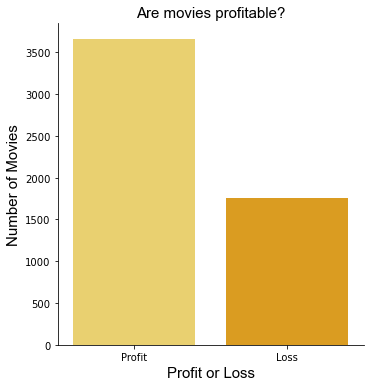

In [60]:
# ww_profit column has both positive and negative values
merged_df2['Profit or Loss'] = merged_df2['ww_profit'].apply(lambda x: 'Profit' if x >= 0 else 'Loss')

#def profit_loss(x):
# if x:
#  if x >= 0:
#   return “Profit”
#  else: 
#   return “Loss”
# else:
#  return x
#merged_df2['Profit or Loss'] = merged_df2['ww_profit'].apply(profit_loss)
# Plot count of positive vs negative profit margins
sns.catplot(x='Profit or Loss', kind='count', palette=['#FDDC5C','#F9A602'], data=merged_df2)
plt.xlabel('Profit or Loss', fontfamily = 'Arial', fontsize = 15)
plt.ylabel('Number of Movies', fontfamily = 'Arial', fontsize = 15)
plt.title('Are movies profitable?', fontfamily = 'Arial', fontsize = 15)
plt.show()

In [61]:
# Scatter plot of the data
# x-axis: "radio", y-axis: "sales"
# Label the points as "Data points"
# Use 'mustard' color for the points
#data.plot(x="cpi_worldwide_gross", y="ww_profit", kind="scatter", label="Data points", color='#DAA520', ax=ax)

# Plot the regression line
#sm.graphics.abline_plot(model_results=results_radio, label="Regression line (radio)", c="black", linewidth=2, ax=ax)

# Add a legend to the plot
#ax.legend()

# Display the plot
#plt.show()

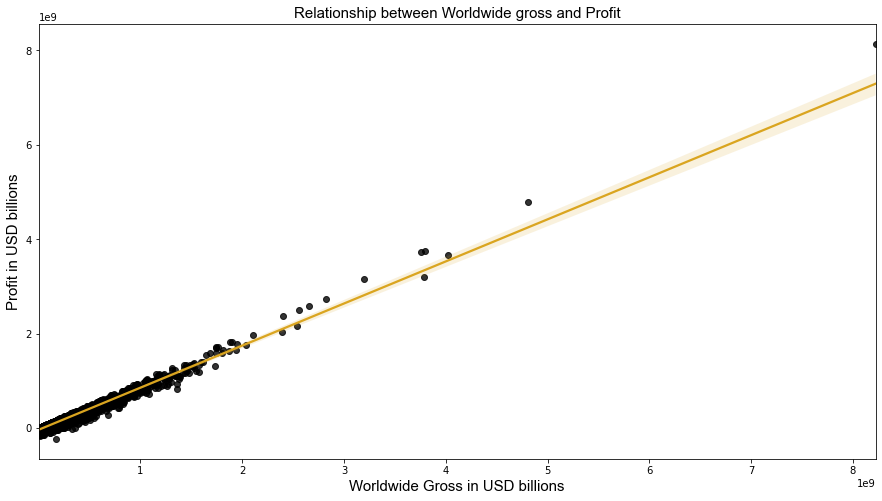

In [62]:
# Plot relationship between profit and worldwide gross
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the Q-Q plot with specified colors
# 'results.resid' contains the residuals from the model
# 'dist=norm' specifies the normal distribution
# 'line="45"' draws the 45-degree reference line
# 'fit=True' fits a line to the quantiles
# 'ax=ax' specifies the axis for plotting
#sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)

# Customize the appearance of the data points (color to gold - '#DAA520')
#ax.get_lines()[0].set_markeredgecolor('#DAA520')
#ax.get_lines()[0].set_markerfacecolor('#DAA520')

# Customize the appearance of the reference line (in black)
#ax.get_lines()[1].set_color('black')

sns.regplot(
    x='cpi_worldwide_gross',
    y='ww_profit',
    data=merged_df2,
    scatter_kws={"color": 'black'},
    line_kws={"color": '#DAA520'},
    ci=95,  # Adjust the confidence interval
)

plt.title('Relationship between Worldwide gross and Profit', fontfamily = 'Arial', fontsize = 15)
plt.xlabel('Worldwide Gross in USD billions', fontfamily = 'Arial', fontsize = 15)
plt.ylabel('Profit in USD billions', fontfamily = 'Arial', fontsize = 15)

plt.show()

This plot shows a strong, positive, linear association between profit in the USA and worldwide profit with a few outliers. 

This means that I can assume (based on how profit has been previously defined), that top grossing films are also the most profitable.  

Next is an exploration into profit a little further to understand the difference between profit and profit margin and realize which one serves as a better measurement for understanding the costs associated with making movies. Since it's been shown that top grossing movies are the most profitable, the top 100 grossing movies will be considered in this analysis.

In [63]:
# Set top_grossing as top 100 movies
top_grossing = merged_df2.sort_values('cpi_worldwide_gross', ascending = False)[:100]

In [64]:
# Describe profit
# Use plain format to remove scientific notation - improves readability
top_grossing['ww_profit'].describe().apply(lambda x: format(x, 'f'))

count           100.000000
mean     1500716176.184142
std       975773368.862980
min       715682677.700608
25%      1041903000.348164
50%      1170982170.965490
75%      1590996604.585480
max      8140129177.320863
Name: ww_profit, dtype: object

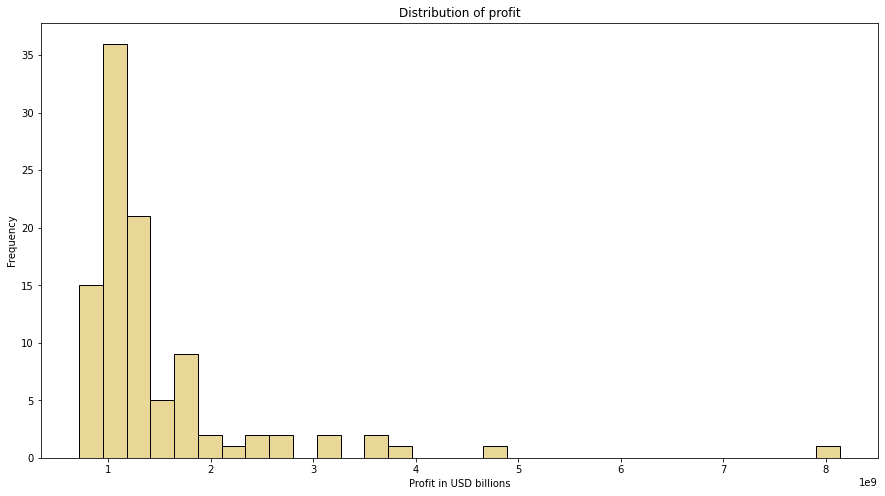

In [65]:
# Plot distribution of profit using histplot
plt.figure(figsize = (15,8))
sns.histplot(top_grossing['ww_profit'])
plt.title('Distribution of profit')
plt.xlabel('Profit in USD billions')
plt.ylabel('Frequency')
plt.show()

This graph shows that the median profit is approximately 1 billion US dollars.

In [66]:
# Create profit margin column
#merged_df2['profit_margin'] = merged_df2.apply(lambda x: ((x['ww_profit']) / (x['cpi_worldwide_gross']))*100, axis = 1)

# Get summary statistics for profit margin
# Use plain formatting to remove scientific notation
merged_df2['global_profit_margin'].describe().apply(lambda x: format(x, 'f'))

count        5424.000000
mean        -2476.786065
std         56451.810711
min      -3846053.846154
25%           -42.630676
50%            47.043666
75%            74.845585
max            99.944444
Name: global_profit_margin, dtype: object

There is a significant outlier with a large negative value. Additionally, a considerable portion of these movies have a negative profit margin, indicating a loss. So again, the analysis will only consider the top 100 grossing movies.

In [67]:
# Set top_grossing as top 100 movies
#top_grossing = merged_df2.sort_values('cpi_worldwide_gross', ascending = False)[:100]
# Describe profit
top_grossing['global_profit_margin'].describe().apply(lambda x: format(x, 'f'))

count    100.000000
mean      86.701421
std        8.223949
min       60.733080
25%       81.211347
50%       86.982954
75%       92.969422
max       99.679851
Name: global_profit_margin, dtype: object

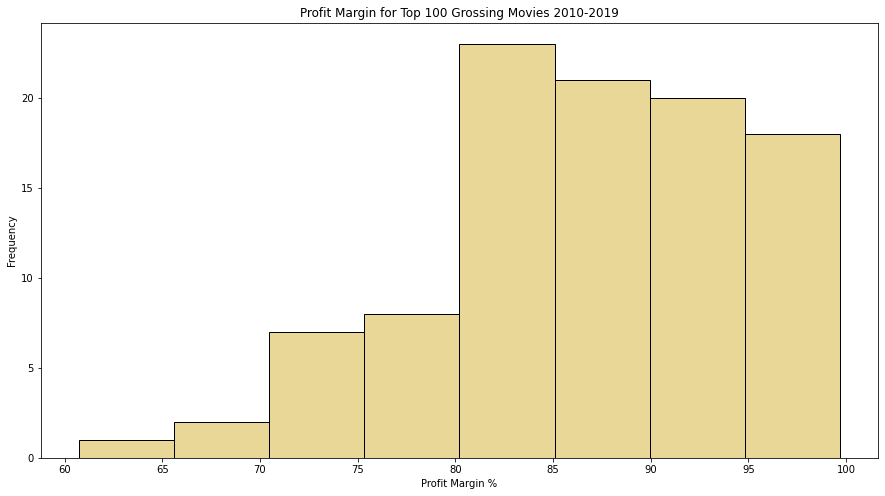

In [68]:
# Plot distribution of profit margin for top_grossing using distplot
plt.figure(figsize = (15,8))
sns.histplot(top_grossing['global_profit_margin'])
plt.title('Profit Margin for Top 100 Grossing Movies 2010-2019')
plt.xlabel('Profit Margin %')
plt.ylabel('Frequency')
plt.show()

The profit margin for a top 100 all-time grossing movie is approximately 85%

In [69]:
# Get top profit movies 
top_profit = top_grossing.sort_values('ww_profit', ascending = False)
top_profit

,title,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget,ww_profit,global_profit_margin,Profit or Loss
4716,Gone with the Wind,NaN,NaN,1939,3900000.0,198680470.0,3.905252e+08,NaN,NaN,NaN,NaN,1939-12-15 00:00:00,NaN,NaN,8.222241e+09,4.183082e+09,NaN,8.211183e+07,8.140129e+09,99.001345,Profit
5274,Bambi,NaN,NaN,1942,858000.0,102797000.0,2.680000e+08,NaN,NaN,NaN,NaN,1942-08-13 00:00:00,NaN,NaN,4.811751e+09,1.845648e+09,NaN,1.540478e+07,4.796346e+09,99.679851,Profit
3877,Star Wars Ep. IV: A New Hope,NaN,NaN,1977,11000000.0,460998007.0,7.865980e+08,NaN,NaN,NaN,NaN,1977-05-25 00:00:00,NaN,NaN,3.798710e+09,2.226293e+09,NaN,5.312219e+07,3.745588e+09,98.601573,Profit
5115,Snow White and the Seven Dwarfs,NaN,NaN,1937,1488000.0,184925486.0,1.849255e+08,NaN,NaN,NaN,NaN,1937-12-21 00:00:00,NaN,NaN,3.758289e+09,3.758289e+09,NaN,3.024102e+07,3.728048e+09,99.195352,Profit
1341,Titanic,NaN,NaN,1997,200000000.0,659363944.0,2.208208e+09,NaN,NaN,NaN,NaN,1997-12-19 00:00:00,NaN,NaN,4.026438e+09,1.202281e+09,NaN,3.646791e+08,3.661758e+09,90.942884,Profit
1324,Avatar,NaN,NaN,2009,425000000.0,760507625.0,2.776345e+09,"[28, 12, 14, 878]",en,Avatar,26.526,2009-12-18,7.4,18676.0,3.787278e+09,1.037426e+09,NaN,5.797526e+08,3.207526e+09,84.692106,Profit
4870,Cinderella,NaN,NaN,1950,2900000.0,85000000.0,2.635914e+08,NaN,NaN,NaN,NaN,1950-02-15 00:00:00,NaN,NaN,3.200886e+09,1.032186e+09,NaN,3.521575e+07,3.165670e+09,98.899812,Profit
3783,The Exorcist,NaN,NaN,1973,12000000.0,230347346.0,4.282145e+08,NaN,NaN,NaN,NaN,1973-12-26 00:00:00,NaN,NaN,2.822502e+09,1.518295e+09,NaN,7.909595e+07,2.743406e+09,97.197666,Profit
4172,The Sound of Music,NaN,NaN,1965,8200000.0,163214286.0,2.862143e+08,NaN,NaN,NaN,NaN,1965-03-02 00:00:00,NaN,NaN,2.659112e+09,1.516364e+09,NaN,7.618321e+07,2.582929e+09,97.135014,Profit
3782,Jaws,NaN,NaN,1975,12000000.0,260000000.0,4.707000e+08,NaN,NaN,NaN,NaN,1975-06-20 00:00:00,NaN,NaN,2.560459e+09,1.414318e+09,NaN,6.527621e+07,2.495183e+09,97.450605,Profit


In [70]:
# Get top profit margin movies 
top_margin = top_grossing.sort_values('global_profit_margin', ascending = False)
top_margin

,title,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget,ww_profit,global_profit_margin,Profit or Loss
5274,Bambi,NaN,NaN,1942,858000.0,102797000.0,2.680000e+08,NaN,NaN,NaN,NaN,1942-08-13 00:00:00,NaN,NaN,4.811751e+09,1.845648e+09,NaN,1.540478e+07,4.796346e+09,99.679851,Profit
5184,Rocky,NaN,NaN,1976,1000000.0,117235147.0,2.250000e+08,NaN,NaN,NaN,NaN,1976-11-21 00:00:00,NaN,NaN,1.157247e+09,6.029781e+08,NaN,5.143322e+06,1.152104e+09,99.555556,Profit
5115,Snow White and the Seven Dwarfs,NaN,NaN,1937,1488000.0,184925486.0,1.849255e+08,NaN,NaN,NaN,NaN,1937-12-21 00:00:00,NaN,NaN,3.758289e+09,3.758289e+09,NaN,3.024102e+07,3.728048e+09,99.195352,Profit
4716,Gone with the Wind,NaN,NaN,1939,3900000.0,198680470.0,3.905252e+08,NaN,NaN,NaN,NaN,1939-12-15 00:00:00,NaN,NaN,8.222241e+09,4.183082e+09,NaN,8.211183e+07,8.140129e+09,99.001345,Profit
4870,Cinderella,NaN,NaN,1950,2900000.0,85000000.0,2.635914e+08,NaN,NaN,NaN,NaN,1950-02-15 00:00:00,NaN,NaN,3.200886e+09,1.032186e+09,NaN,3.521575e+07,3.165670e+09,98.899812,Profit
3928,ET: The Extra-Terrestrial,NaN,NaN,1982,10500000.0,435110554.0,7.929653e+08,NaN,NaN,NaN,NaN,1982-06-11 00:00:00,NaN,NaN,2.404821e+09,1.319557e+09,NaN,3.184329e+07,2.372978e+09,98.675856,Profit
3877,Star Wars Ep. IV: A New Hope,NaN,NaN,1977,11000000.0,460998007.0,7.865980e+08,NaN,NaN,NaN,NaN,1977-05-25 00:00:00,NaN,NaN,3.798710e+09,2.226293e+09,NaN,5.312219e+07,3.745588e+09,98.601573,Profit
4379,Grease,NaN,NaN,1978,6000000.0,181813770.0,3.875102e+08,NaN,NaN,NaN,NaN,1978-06-16 00:00:00,NaN,NaN,1.739368e+09,8.160845e+08,NaN,2.693144e+07,1.712437e+09,98.451654,Profit
4793,Goldfinger,NaN,NaN,1964,3000000.0,51100000.0,1.249000e+08,NaN,NaN,NaN,NaN,1964-12-22 00:00:00,NaN,NaN,1.179116e+09,4.824087e+08,NaN,2.832145e+07,1.150795e+09,97.598078,Profit
3782,Jaws,NaN,NaN,1975,12000000.0,260000000.0,4.707000e+08,NaN,NaN,NaN,NaN,1975-06-20 00:00:00,NaN,NaN,2.560459e+09,1.414318e+09,NaN,6.527621e+07,2.495183e+09,97.450605,Profit


This is interesting, note that the movies with the all-time highest profit differ from those with the highest all-time profit margin. 

## Release Date Analysis

The month that a movie is released may greatly influence profitability so when is the most profitable time to release a movie? By investigating the release month of a movie and referencing it's worldwide gross, it can be determined if there is a more profitable time to release movies. 

In [71]:
genre_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239045 entries, 0 to 239375
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   movie_id               234996 non-null  object 
 1   primary_title          234996 non-null  object 
 2   original_title         235189 non-null  object 
 3   release_year           239045 non-null  float64
 4   runtime_minutes        195942 non-null  float64
 5   genres                 229588 non-null  object 
 6   genre                  229588 non-null  object 
 7   title                  7719 non-null    object 
 8   studio                 2933 non-null    object 
 9   foreign_gross          2611 non-null    float64
 10  production_budget      7719 non-null    float64
 11  domestic_gross         7719 non-null    float64
 12  worldwide_gross        7719 non-null    float64
 13  genre_ids              3678 non-null    object 
 14  original_language      3678 non-null

In [72]:
merged_df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5424 entries, 0 to 5569
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  5424 non-null   object 
 1   studio                 1217 non-null   object 
 2   foreign_gross          1064 non-null   float64
 3   year                   5424 non-null   int64  
 4   production_budget      5424 non-null   float64
 5   domestic_gross         5424 non-null   float64
 6   worldwide_gross        5424 non-null   float64
 7   genre_ids              1509 non-null   object 
 8   original_language      1509 non-null   object 
 9   original_title         1509 non-null   object 
 10  popularity             1509 non-null   float64
 11  release_date           5424 non-null   object 
 12  vote_average           1509 non-null   float64
 13  vote_count             1509 non-null   float64
 14  cpi_worldwide_gross    5424 non-null   float64
 15  cpi_

In [73]:
#view useful data
merged_df2[['release_date', 'title']]

,release_date,title
0,2010-06-17,Toy Story 3
1,2010-07-16,Inception
2,2010-05-16,Shrek Forever After
3,2010-06-23,The Twilight Saga: Eclipse
4,2010-05-07,Iron Man 2
...,...,...
5565,2006-05-26 00:00:00,Cavite
5566,2004-12-31 00:00:00,The Mongol King
5567,1999-04-02 00:00:00,Following
5568,2005-07-13 00:00:00,Return to the Land of Wonders


In [74]:
#create a release_month column
merged_df2['release_month']=pd.DatetimeIndex(merged_df2['release_date']).month

This function will useful to create subsequent multiuple visualizations on this data. Visualizing the number of movies released each month and the worldwide gross for each month will provide insight on the best range of dates to release a movie.

In [75]:
#def release_month_visual(df):
    # Create a figure with 1 row and 2 columns
#    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 8))
    
    # Create a count plot for the number of movies released each month
#    sns.countplot(x='release_month', color='#BF9B0C', data=df, ax=ax[0])
#    ax[0].set_xlabel('Release Month')
#    ax[0].set_ylabel('Number of Movies')
#    ax[0].set_title('Number of Movies Released Each Month')
    
    # Create a bar plot for the worldwide gross by release month
    # Note: Replace 'cpi_worldwide_gross' with the correct column name for worldwide gross in your DataFrame
#    sns.barplot(x='release_month', y='cpi_worldwide_gross', color='#F4D054', data=df, ax=ax[1])
#    ax[1].set_xlabel('Release Month')
#    ax[1].set_ylabel('Worldwide Gross in USD')
#    ax[1].set_title('Worldwide Gross by Release Month')
    
    # Show the plot
#    plt.show()
    
#This creates a two-panel figure with a count plot on the left showing
#the number of movies released each month, and a bar plot on the 
#right showing the worldwide gross by release month. The plt.show()
#function at the end of release_month_visual will display the 
#figure when the function is called.    

In [76]:
from matplotlib.ticker import FuncFormatter

def billions_formatter(x, pos):
    """Function to format y-axis labels to display in billions"""
    return f'${x/1e9:.0f}B'

def release_month_visual(df):
# Create a figure with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8))
# Create a count plot for the number of movies released each month
    sns.countplot(x='release_month', color='#BF9B0C', data=df, ax=ax1)
    ax1.set_xlabel('Release Month')
    ax1.set_ylabel('Number of Movies')
    ax1.set_title('Number of Movies Released Each Month')
# Create a bar plot for the worldwide gross by release month
    sns.barplot(x='release_month', y='cpi_worldwide_gross', estimator=sum, ci=None, color='#F4D054', data=df, ax=ax2)
    ax2.set_xlabel('Release Month')
    ax2.set_ylabel('Worldwide Gross in USD')
    ax2.set_title('Worldwide Gross by Release Month')

    
    # Adjusting the formatting of the y-axis for the second plot
    formatter = FuncFormatter(billions_formatter)
    ax2.yaxis.set_major_formatter(formatter)

    plt.tight_layout()
# Show the plot
    plt.show()


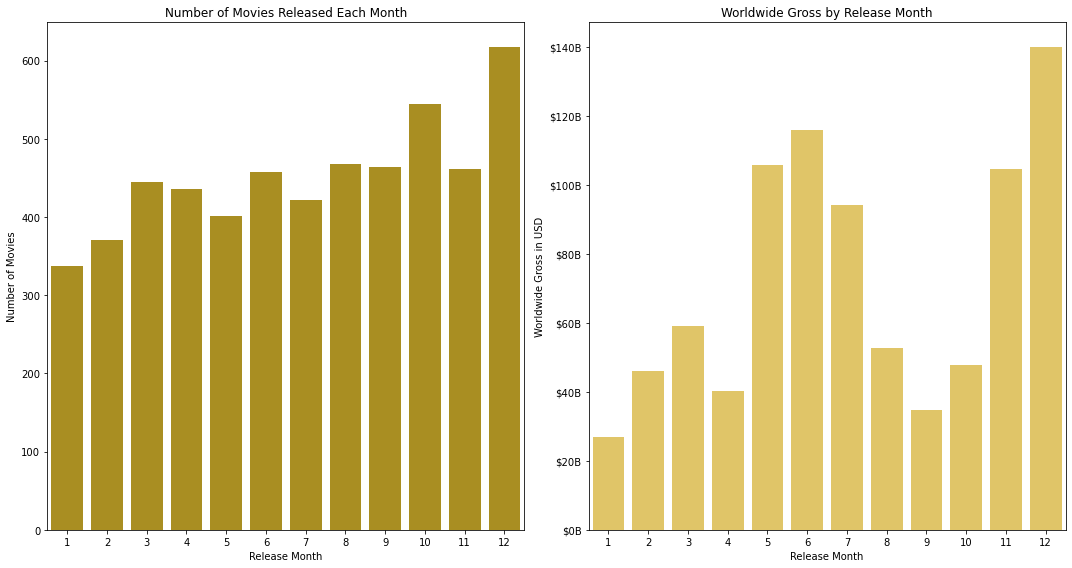

In [77]:
#run the function on merged_df2
release_month_visual(merged_df2)

adjust the drop... to give a clean df only containing the answers that I want

wait can I do release date by location and time of year... like dominos to make the most money release in the right order? ormaybe just foreign and domestic?

This visual shows a somewhat gradual increase in movie releases from January to December. December has the largest number of movie releases. Worldwide gross shows a sharp contrast from May to July and in November/December compared to the rest of the months.

In [78]:
print('Total number of results:', len(top_grossing))
top_grossing

Total number of results: 100


,title,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget,ww_profit,global_profit_margin,Profit or Loss
4716,Gone with the Wind,NaN,NaN,1939,3900000.0,198680470.0,3.905252e+08,NaN,NaN,NaN,NaN,1939-12-15 00:00:00,NaN,NaN,8.222241e+09,4.183082e+09,NaN,8.211183e+07,8.140129e+09,99.001345,Profit
5274,Bambi,NaN,NaN,1942,858000.0,102797000.0,2.680000e+08,NaN,NaN,NaN,NaN,1942-08-13 00:00:00,NaN,NaN,4.811751e+09,1.845648e+09,NaN,1.540478e+07,4.796346e+09,99.679851,Profit
1341,Titanic,NaN,NaN,1997,200000000.0,659363944.0,2.208208e+09,NaN,NaN,NaN,NaN,1997-12-19 00:00:00,NaN,NaN,4.026438e+09,1.202281e+09,NaN,3.646791e+08,3.661758e+09,90.942884,Profit
3877,Star Wars Ep. IV: A New Hope,NaN,NaN,1977,11000000.0,460998007.0,7.865980e+08,NaN,NaN,NaN,NaN,1977-05-25 00:00:00,NaN,NaN,3.798710e+09,2.226293e+09,NaN,5.312219e+07,3.745588e+09,98.601573,Profit
1324,Avatar,NaN,NaN,2009,425000000.0,760507625.0,2.776345e+09,"[28, 12, 14, 878]",en,Avatar,26.526,2009-12-18,7.4,18676.0,3.787278e+09,1.037426e+09,NaN,5.797526e+08,3.207526e+09,84.692106,Profit
5115,Snow White and the Seven Dwarfs,NaN,NaN,1937,1488000.0,184925486.0,1.849255e+08,NaN,NaN,NaN,NaN,1937-12-21 00:00:00,NaN,NaN,3.758289e+09,3.758289e+09,NaN,3.024102e+07,3.728048e+09,99.195352,Profit
4870,Cinderella,NaN,NaN,1950,2900000.0,85000000.0,2.635914e+08,NaN,NaN,NaN,NaN,1950-02-15 00:00:00,NaN,NaN,3.200886e+09,1.032186e+09,NaN,3.521575e+07,3.165670e+09,98.899812,Profit
3783,The Exorcist,NaN,NaN,1973,12000000.0,230347346.0,4.282145e+08,NaN,NaN,NaN,NaN,1973-12-26 00:00:00,NaN,NaN,2.822502e+09,1.518295e+09,NaN,7.909595e+07,2.743406e+09,97.197666,Profit
4172,The Sound of Music,NaN,NaN,1965,8200000.0,163214286.0,2.862143e+08,NaN,NaN,NaN,NaN,1965-03-02 00:00:00,NaN,NaN,2.659112e+09,1.516364e+09,NaN,7.618321e+07,2.582929e+09,97.135014,Profit
3782,Jaws,NaN,NaN,1975,12000000.0,260000000.0,4.707000e+08,NaN,NaN,NaN,NaN,1975-06-20 00:00:00,NaN,NaN,2.560459e+09,1.414318e+09,NaN,6.527621e+07,2.495183e+09,97.450605,Profit


In [79]:
#create a release_month column
top_grossing['release_month']=pd.DatetimeIndex(top_grossing['release_date']).month

In [80]:
#run the function on top_grossing
#release_month_visual(top_grossing)

In [81]:
#creating a month column in the df
#rm_analysis = sorted_df.copy()
#rm_analysis['month'] = pd.to_datetime(rm_analysis['release_date']).dt.month
#rm_analysis = rm_analysis.drop(columns=["release_date", "movie", "year"])
#rm_analysis = rm_analysis.groupby("month").mean().reset_index()

In [82]:
from collections import Counter

def release_month_visual_tg(df):
    # Create a Counter of months from the available data
    months_counter = Counter(df['release_month'])
    print(months_counter)
    # Define all months you want to display
    all_months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

    # Create counts for all months, filling missing months with zero counts
    counts_per_month = {month: months_counter.get(index + 1, 0) for index, month in enumerate(all_months)}
    print(counts_per_month) 
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(x=list(counts_per_month.keys()), y=list(counts_per_month.values()),
                     color='goldenrod', label='Number of Movies', ci=None)

    # Set positions and labels for x-axis ticks
    ax.set_xticks(range(len(all_months)))
    ax.set_xticklabels(all_months)

    ax.set_xlabel('Release Month', fontfamily='Arial', fontsize=15)
    ax.set_ylabel('Number of Movies', fontfamily='Arial', fontsize=15)
    ax.set_title('Number of Movies Released Each Month', fontfamily='Arial', fontsize=15)

    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    plt.tight_layout()
    plt.show()


Counter({5: 20, 12: 19, 6: 17, 7: 16, 11: 12, 3: 6, 4: 4, 2: 3, 8: 2, 1: 1})
{'JAN': 1, 'FEB': 3, 'MAR': 6, 'APR': 4, 'MAY': 20, 'JUN': 17, 'JUL': 16, 'AUG': 2, 'SEP': 0, 'OCT': 0, 'NOV': 12, 'DEC': 19}


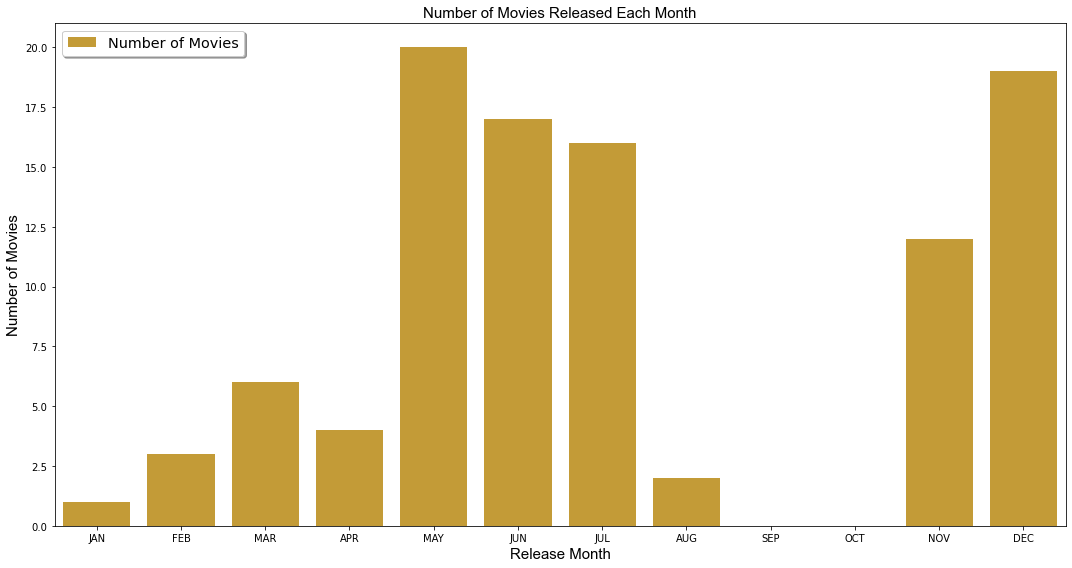

In [83]:
release_month_visual_tg(top_grossing)

This visual somewhat agrees with what was shown previously in that May, June, July, and December are the best months to release movies.

### Release Date Summary

This analysis shows that there is a connection between release date and top grossing movies. However, caution - other factors like wide vs limited release, ad budget, movie of the decade?, withstand the test of time? or just a one hit wonder? - goals (lots of $ in short term or more over long term).  




## Runtime Analysis

Genre can impact the length of a movie. Kid and family films are generally 90 minute while action movies tend to be 120 minutes or longer.

Again focusing on the most profitable genres, it can be determined what the most typical runtimes for each genre should be.

In [84]:
# Merge the DataFrames on 'original_title' and 'start_year' in 'movie_basics_ga' with 'title' and 'year' in 'merged_df2'
runtime_analysis = pd.merge(
    movie_basics_ga, 
    merged_df2, 
    left_on=['primary_title', 'start_year'], 
    right_on=['title', 'year'], 
    how='outer'
).drop_duplicates()



print('Total number of results:', len(runtime_analysis))
runtime_analysis

Total number of results: 239045


,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,genre,title,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title_y,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget,ww_profit,global_profit_margin,Profit or Loss,release_month
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",Biography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavite,NaN,NaN,2006.0,7000.0,70071.0,71644.0,NaN,NaN,NaN,NaN,2006-05-26 00:00:00,NaN,NaN,104002.851290,101719.387426,NaN,10161.631944,93841.219345,90.229468,Profit,5.0
239041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Mongol King,NaN,NaN,2004.0,7000.0,900.0,900.0,NaN,NaN,NaN,NaN,2004-12-31 00:00:00,NaN,NaN,1394.332980,1394.332980,NaN,10844.812070,-9450.479089,-677.777778,Loss,12.0
239042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Following,NaN,NaN,1999.0,6000.0,48482.0,240495.0,NaN,NaN,NaN,NaN,1999-04-02 00:00:00,NaN,NaN,422461.369898,85165.064286,NaN,10539.795918,411921.573980,97.505146,Profit,4.0
239043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Return to the Land of Wonders,NaN,NaN,2005.0,5000.0,1338.0,1338.0,NaN,NaN,NaN,NaN,2005-07-13 00:00:00,NaN,NaN,2004.978955,2004.978955,NaN,7492.447517,-5487.468561,-273.692078,Loss,7.0


In [85]:
# Fill NaN or 0.0 cells in column original_title_x with value from original_title_y
runtime_analysis['original_title_x'].fillna(runtime_analysis['original_title_y'], inplace=True)

# Drop the 'title' column
runtime_analysis.drop(columns=['original_title_y'], inplace=True)

# Rename 'original_title_x' to 'original_title'
runtime_analysis.rename(columns={'original_title_x': 'original_title'}, inplace=True)

# Fill NaN or 0.0 cells in column start_year with value from year
runtime_analysis['start_year'].fillna(runtime_analysis['year'], inplace=True)

# Drop the 'year' column
runtime_analysis.drop(columns=['year'], inplace=True)

# Rename 'start_year' to 'years'
runtime_analysis.rename(columns={'start_year': 'release_year'}, inplace=True)
runtime_analysis

,movie_id,primary_title,original_title,release_year,runtime_minutes,genres,genre,title,studio,foreign_gross,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget,ww_profit,global_profit_margin,Profit or Loss,release_month
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",Biography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239040,NaN,NaN,NaN,2006.0,NaN,NaN,NaN,Cavite,NaN,NaN,7000.0,70071.0,71644.0,NaN,NaN,NaN,2006-05-26 00:00:00,NaN,NaN,104002.851290,101719.387426,NaN,10161.631944,93841.219345,90.229468,Profit,5.0
239041,NaN,NaN,NaN,2004.0,NaN,NaN,NaN,The Mongol King,NaN,NaN,7000.0,900.0,900.0,NaN,NaN,NaN,2004-12-31 00:00:00,NaN,NaN,1394.332980,1394.332980,NaN,10844.812070,-9450.479089,-677.777778,Loss,12.0
239042,NaN,NaN,NaN,1999.0,NaN,NaN,NaN,Following,NaN,NaN,6000.0,48482.0,240495.0,NaN,NaN,NaN,1999-04-02 00:00:00,NaN,NaN,422461.369898,85165.064286,NaN,10539.795918,411921.573980,97.505146,Profit,4.0
239043,NaN,NaN,NaN,2005.0,NaN,NaN,NaN,Return to the Land of Wonders,NaN,NaN,5000.0,1338.0,1338.0,NaN,NaN,NaN,2005-07-13 00:00:00,NaN,NaN,2004.978955,2004.978955,NaN,7492.447517,-5487.468561,-273.692078,Loss,7.0


In [86]:
#view useful data
runtime_analysis[['runtime_minutes', 'title']]

,runtime_minutes,title
0,175.0,NaN
1,175.0,NaN
2,175.0,NaN
3,114.0,NaN
4,114.0,NaN
...,...,...
239040,NaN,Cavite
239041,NaN,The Mongol King
239042,NaN,Following
239043,NaN,Return to the Land of Wonders


In [87]:
# Get number of missing values per column
runtime_analysis.isna().sum()

movie_id                   4049
primary_title              4049
original_title             3856
release_year                  0
runtime_minutes           43103
genres                     9457
genre                      9457
title                    231326
studio                   236112
foreign_gross            236434
production_budget        231326
domestic_gross           231326
worldwide_gross          231326
genre_ids                235367
original_language        235367
popularity               235367
release_date             231326
vote_average             235367
vote_count               235367
cpi_worldwide_gross      231326
cpi_domestic_gross       231326
cpi_foreign_gross        236434
cpi_production_budget    231326
ww_profit                231326
global_profit_margin     231326
Profit or Loss           231326
release_month            231326
dtype: int64

In [88]:
# % of missing values for runtime
(runtime_analysis['runtime_minutes'].isna().sum()/len(runtime_analysis)*100).round(2)

18.03

This is significant. The missing values will have to be filled.

In [89]:
# Consider mean
runtime_analysis['runtime_minutes'].mean().round(2)

86.63

In [90]:
# Consider median
runtime_analysis['runtime_minutes'].median().round(2)

88.0

The median of 88 minutes is a better option as it is less sensitive to outliers than the mean. We note that both figures are similar though. We will elect to fill missing values with the median.

EDIT

In [91]:
# Fill missing values with median
runtime_analysis['runtime_minutes'] = runtime_analysis['runtime_minutes'].fillna(runtime_analysis['runtime_minutes'].median())

In [92]:
# % of missing values for genre
(runtime_analysis['genres'].isna().sum()/len(runtime_analysis)*100).round(2)


3.96

In [93]:
# % of missing values for original_title
(runtime_analysis['original_title'].isna().sum()/len(runtime_analysis)*100).round(2)


1.61

Both genre and original titles have a low percentage of missing values so those rows can be dropped.

In [94]:
# Drop rows that contain null values
runtime_analysis =runtime_analysis.dropna()

In [95]:
# Check for duplicates
runtime_analysis.duplicated().any()

False

In [96]:
#get statistics for movie runtime
runtime_analysis[['original_title', 'runtime_minutes']].describe()

####is this even possible?


,runtime_minutes
count,2451.000000
mean,110.050592
std,17.778911
min,5.000000
25%,97.000000
50%,107.000000
75%,120.000000
max,180.000000


In [97]:
# Define function to plot, as I plan to plot runtime for various dataframes

def runtime_visual(df,title):
    ''' Creates a Seaborn histplot of runtime_minutes column'''
    plt.figure(figsize=(15, 8))
    sns.histplot(df['runtime_minutes'], kde=True)
    plt.title(title)
    plt.xlabel('Minutes')
    plt.ylabel('Frequency')
    return plt.show()

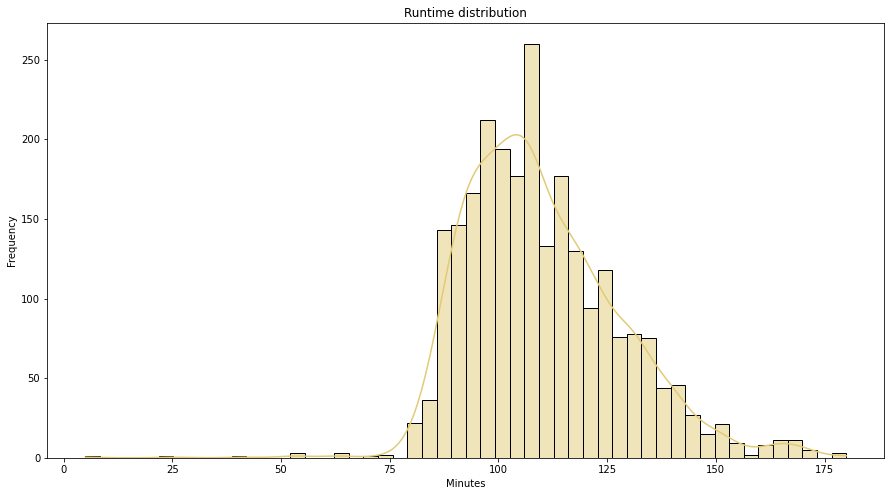

In [98]:
# Call runtime_visual function on movies DataFrame
runtime_visual(runtime_analysis, 'Runtime distribution')

The median is approximately 107 minutes

In [99]:
# Use the Pandas cut method to map the Runtime into the above ranges
runtime_bin_edges = [66, 100, 111, 123, 187]
runtime_bin_names = ['Short', 'Medium', 'Long', ' Very Long']
runtime_analysis['runtime_range'] = pd.cut(runtime_analysis.runtime_minutes, runtime_bin_edges, labels=runtime_bin_names)
runtime_analysis.head()

<ipython-input-99-1b4d755e9a22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_analysis['runtime_range'] = pd.cut(runtime_analysis.runtime_minutes, runtime_bin_edges, labels=runtime_bin_names)


,movie_id,primary_title,original_title,release_year,runtime_minutes,genres,genre,title,studio,foreign_gross,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget,ww_profit,global_profit_margin,Profit or Loss,release_month,runtime_range
97,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",Adventure,The Secret Life of Walter Mitty,Fox,129900000.0,91000000.0,58236838.0,187861183.0,"[12, 35, 18, 14]",en,10.743,2013-12-25,7.1,4859.0,2.360028e+08,7.316072e+07,1.631884e+08,1.143198e+08,1.216830e+08,51.559977,Profit,12.0,Long
98,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",Comedy,The Secret Life of Walter Mitty,Fox,129900000.0,91000000.0,58236838.0,187861183.0,"[12, 35, 18, 14]",en,10.743,2013-12-25,7.1,4859.0,2.360028e+08,7.316072e+07,1.631884e+08,1.143198e+08,1.216830e+08,51.559977,Profit,12.0,Long
99,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",Drama,The Secret Life of Walter Mitty,Fox,129900000.0,91000000.0,58236838.0,187861183.0,"[12, 35, 18, 14]",en,10.743,2013-12-25,7.1,4859.0,2.360028e+08,7.316072e+07,1.631884e+08,1.143198e+08,1.216830e+08,51.559977,Profit,12.0,Long
107,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",Action,A Walk Among the Tombstones,Uni.,26900000.0,28000000.0,26017685.0,62108587.0,"[80, 18, 9648, 53]",en,19.373,2014-09-19,6.3,1685.0,7.677915e+07,3.216328e+07,3.325400e+07,3.461383e+07,4.216532e+07,54.917667,Profit,9.0,Long
108,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",Crime,A Walk Among the Tombstones,Uni.,26900000.0,28000000.0,26017685.0,62108587.0,"[80, 18, 9648, 53]",en,19.373,2014-09-19,6.3,1685.0,7.677915e+07,3.216328e+07,3.325400e+07,3.461383e+07,4.216532e+07,54.917667,Profit,9.0,Long


Text(0.5, 1.02, 'Movie Count of each Runtime Range')

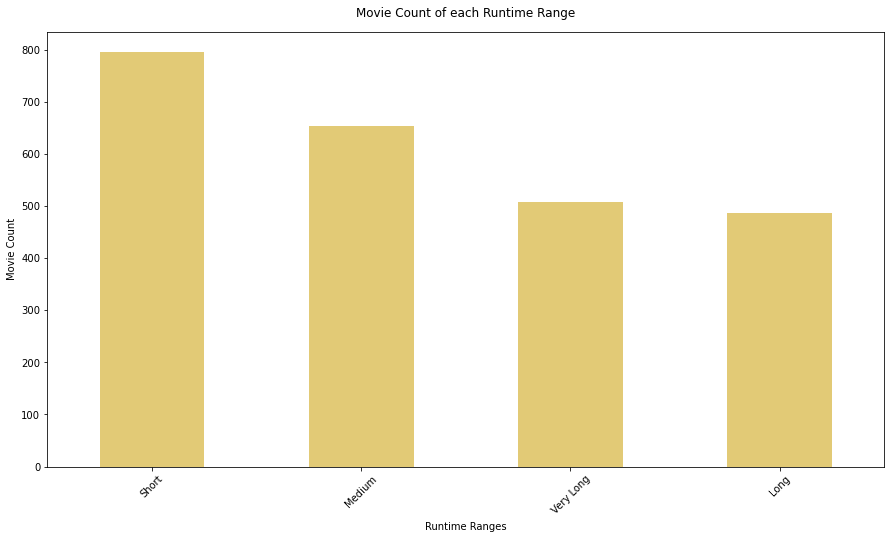

In [100]:
# Plot the count of different runtime 
plt.figure(figsize=(15, 8))
ax = runtime_analysis.runtime_range.value_counts().plot.bar();
ax.set_ylabel('Movie Count');
ax.set_xlabel('Runtime Ranges')
ax.set_xticklabels(runtime_analysis.runtime_range.value_counts().index, rotation = 45);
ax.set_title('Movie Count of each Runtime Range', y=1.02)

Let's see if this pattern follows for the top grossing movies.

Text(0.5, 1.02, 'Movie Count of each Runtime Range')

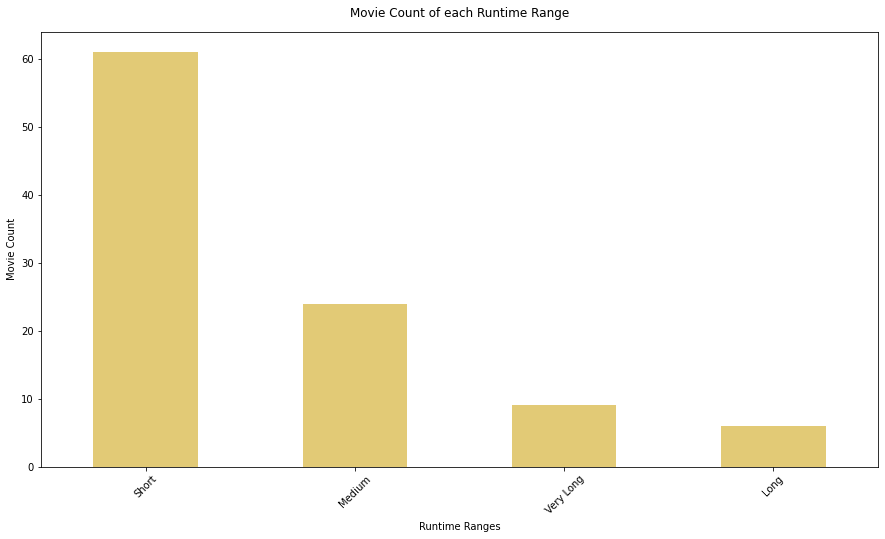

In [101]:
# Set top_grossing2 as top 100 movies
top_grossing2 = runtime_analysis.sort_values('cpi_worldwide_gross', ascending = False)[:100]

# Plot the count of different runtimes of top grossing movies 
plt.figure(figsize=(15, 8))
ax = top_grossing2.runtime_range.value_counts().plot.bar();
ax.set_ylabel('Movie Count');
ax.set_xlabel('Runtime Ranges')
ax.set_xticklabels(runtime_analysis.runtime_range.value_counts().index, rotation = 45);
ax.set_title('Movie Count of each Runtime Range', y=1.02)

In [102]:
# Find out which runtime range receives the highest mean gross
runtime_stats = runtime_analysis.groupby('runtime_range')['cpi_worldwide_gross'].mean()
print('Total number of results:', len(runtime_stats))
runtime_stats

Total number of results: 4


runtime_range
Short         1.924632e+08
Medium        1.828559e+08
Long          2.217363e+08
 Very Long    4.365625e+08
Name: cpi_worldwide_gross, dtype: float64

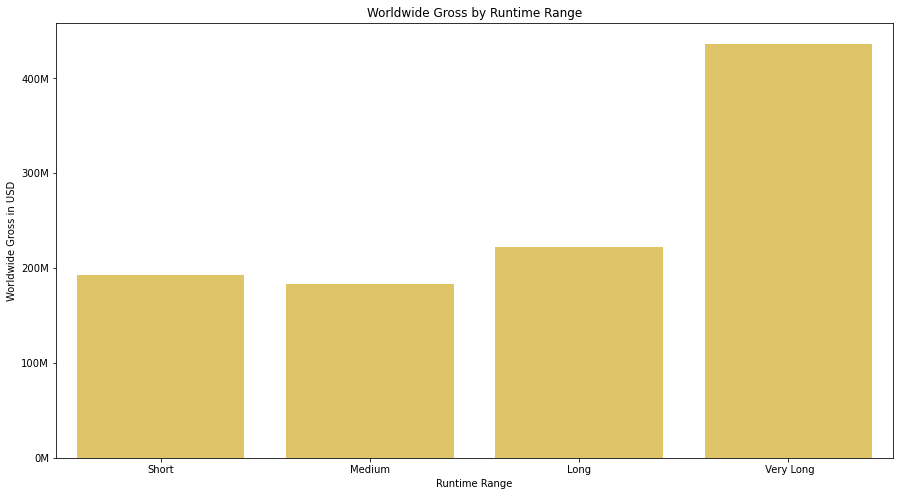

In [103]:
# Recreate the DataFrame from the Series to use it in Seaborn's barplot
runtime_stats = runtime_stats.reset_index()

# Create the plot
plt.figure(figsize=(15, 8))
sns.barplot(x='runtime_range', y='cpi_worldwide_gross', estimator=sum, ci=None, color='#F4D054', data=runtime_stats)
plt.xlabel('Runtime Range')
plt.ylabel('Worldwide Gross in USD')
plt.title('Worldwide Gross by Runtime Range')

# Define a custom formatter function to display values in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

# Apply the millions formatter to the y-axis
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()


add run time to the df from movie_basics (runtime_minutes) and rt_movie_info(runtime) - this one may be hard because I have to merge on the director. (above) need to merge some df

Again, let's compare this to the top 100 grossing movies

In [104]:
# Find out which runtime range receives the highest mean gross
runtime_stats2 = top_grossing2.groupby('runtime_range')['cpi_worldwide_gross'].mean()
print('Total number of results:', len(runtime_stats2))
runtime_stats2

Total number of results: 4


runtime_range
Short         1.176357e+09
Medium        1.425387e+09
Long          1.299822e+09
 Very Long    1.305520e+09
Name: cpi_worldwide_gross, dtype: float64

In [105]:
# Recreate the DataFrame from the Series to use it in Seaborn's barplot without resetting the index
#runtime_stats2 = runtime_stats2.reset_index(drop=True)


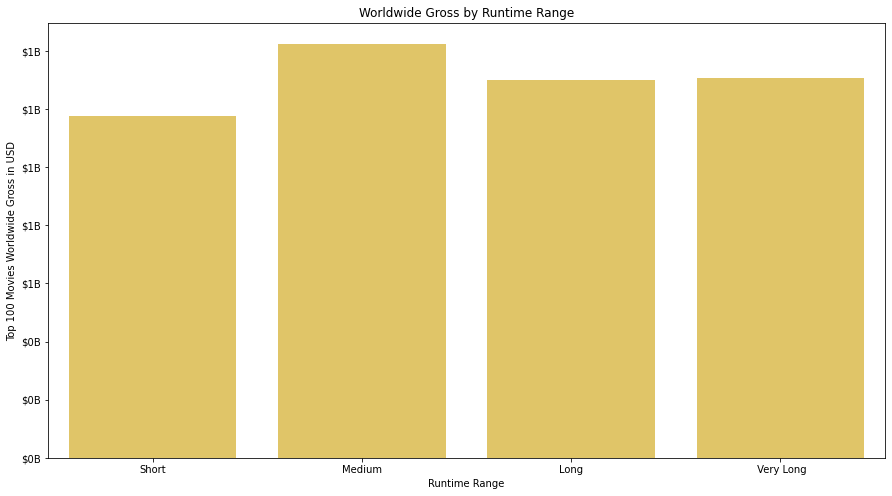

In [106]:
# Recreate the DataFrame from the Series to use it in Seaborn's barplot 
runtime_stats2 = runtime_stats2.reset_index()

# Create the plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='runtime_range', y='cpi_worldwide_gross', estimator=sum, ci=None, color='#F4D054', data=runtime_stats2)
plt.xlabel('Runtime Range')
plt.ylabel('Top 100 Movies Worldwide Gross in USD')
plt.title('Worldwide Gross by Runtime Range')

def billions_formatter(x, pos):
    """Function to format y-axis labels to display in billions"""
    return f'${x/1e9:.0f}B'
    
# Adjusting the formatting of the y-axis 
formatter = FuncFormatter(billions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

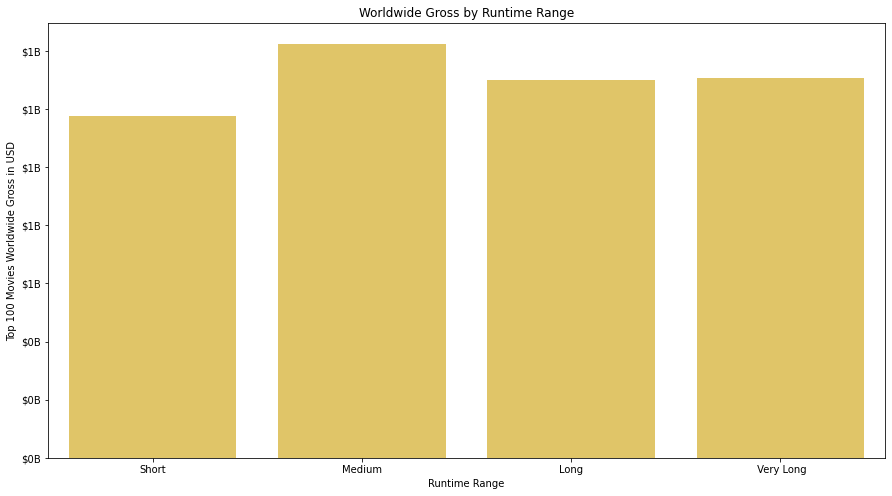

In [107]:
# Recreate the DataFrame from the Series to use it in Seaborn's barplot
runtime_stats2 = runtime_stats2.reset_index(drop=True)

# Create the plot
plt.figure(figsize=(15, 8))
sns.barplot(x='runtime_range', y='cpi_worldwide_gross', estimator=sum, ci=None, color='#F4D054', data=runtime_stats2)
plt.xlabel('Runtime Range')
plt.ylabel('Top 100 Movies Worldwide Gross in USD')
plt.title('Worldwide Gross by Runtime Range')

def billions_formatter(x, pos):
    """Function to format y-axis labels to display in billions"""
    return f'${x/1e9:.0f}B'
    
# Adjusting the formatting of the y-axis 
formatter = FuncFormatter(billions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

## Director/Writer Staff Analysis

Good storytelling along with top-notch movie-making skills draws a crowd, which is why talented directors and writers can attract large audiences. 
A good predictor of a successful film can be tied to the consistency of well-known directors and writers on staff and the potential to produce top grossing films at the box office. 

It would be useful to know which directors and writers have the highest box office profits for films. Focusing on the most profitable genres, directors and writers likely to produce a high grossing film can be identified. 

In [108]:
q='''SELECT name FROM sqlite_schema 
WHERE type = 'table' 
AND name NOT LIKE 'sqlite_%'
ORDER BY 1;'''
df=pd.read_sql(q,conn)
print('Total number of results:', len(df))
df

Total number of results: 10


,name
0,directors
1,known_for
2,merged_df
3,merged_df2
4,movie_akas
5,movie_basics
6,movie_ratings
7,persons
8,principals
9,writers


In [109]:
q="""
SELECT original_title, start_year, title, person_id, primary_name, birth_year
FROM persons
JOIN directors USING(person_id)
--JOIN writers USING(person_id)
JOIN movie_akas USING(movie_id)
JOIN movie_basics USING(movie_id)
WHERE birth_year is not null
GROUP BY person_id
;
"""
director_df=pd.read_sql(q,conn)
print('Total number of results:', len(director_df))
director_df.head()

Total number of results: 16017


,original_title,start_year,title,person_id,primary_name,birth_year
0,The Other Side of the Wind,2018,Al otro lado del viento,nm0000080,Orson Welles,1915.0
1,You Will Meet a Tall Dark Stranger,2010,Coneixeràs l'home dels teus somnis,nm0000095,Woody Allen,1935.0
2,Arthur 3: la guerre des deux mondes,2010,Arthur 3 and the War of Two Worlds,nm0000108,Luc Besson,1959.0
3,Thor,2011,Manhattan,nm0000110,Kenneth Branagh,1960.0
4,Avatar 2,2021,Avatar 2,nm0000116,James Cameron,1954.0


In [110]:
# make a new column job status 
director_df['job_status'] = "director" 
print('Total number of results:', len(director_df))
director_df.head()

Total number of results: 16017


,original_title,start_year,title,person_id,primary_name,birth_year,job_status
0,The Other Side of the Wind,2018,Al otro lado del viento,nm0000080,Orson Welles,1915.0,director
1,You Will Meet a Tall Dark Stranger,2010,Coneixeràs l'home dels teus somnis,nm0000095,Woody Allen,1935.0,director
2,Arthur 3: la guerre des deux mondes,2010,Arthur 3 and the War of Two Worlds,nm0000108,Luc Besson,1959.0,director
3,Thor,2011,Manhattan,nm0000110,Kenneth Branagh,1960.0,director
4,Avatar 2,2021,Avatar 2,nm0000116,James Cameron,1954.0,director


In [111]:
q="""
SELECT original_title, start_year, title, person_id, primary_name, birth_year
FROM persons
JOIN writers USING(person_id)
JOIN movie_akas USING(movie_id)
JOIN movie_basics USING(movie_id)
WHERE birth_year is not null
GROUP BY person_id
;
"""
writer_df=pd.read_sql(q,conn)
print('Total number of results:', len(writer_df))
writer_df.head()

Total number of results: 19359


,original_title,start_year,title,person_id,primary_name,birth_year
0,U mong pa meung,2011,At the Gate of the Ghost,nm0000041,Akira Kurosawa,1910.0
1,"Love, Marilyn",2012,"Avec amour, Marilyn",nm0000054,Marilyn Monroe,1926.0
2,The Other Side of the Wind,2018,Al otro lado del viento,nm0000080,Orson Welles,1915.0
3,The Croods,2013,Crood Awakening,nm0000092,John Cleese,1939.0
4,You Will Meet a Tall Dark Stranger,2010,Coneixeràs l'home dels teus somnis,nm0000095,Woody Allen,1935.0


In [112]:
# make a new column job status 
writer_df['job_status'] = "writer" 
print('Total number of results:', len(writer_df))
writer_df.head()

Total number of results: 19359


,original_title,start_year,title,person_id,primary_name,birth_year,job_status
0,U mong pa meung,2011,At the Gate of the Ghost,nm0000041,Akira Kurosawa,1910.0,writer
1,"Love, Marilyn",2012,"Avec amour, Marilyn",nm0000054,Marilyn Monroe,1926.0,writer
2,The Other Side of the Wind,2018,Al otro lado del viento,nm0000080,Orson Welles,1915.0,writer
3,The Croods,2013,Crood Awakening,nm0000092,John Cleese,1939.0,writer
4,You Will Meet a Tall Dark Stranger,2010,Coneixeràs l'home dels teus somnis,nm0000095,Woody Allen,1935.0,writer


In [113]:
#append the director and writer dataframes
talent_analysis = director_df.append(writer_df)
talent_analysis = talent_analysis.sort_values(by='original_title', ascending=False)

print('Total number of results:', len(talent_analysis))
talent_analysis

Total number of results: 35376


,original_title,start_year,title,person_id,primary_name,birth_year,job_status
1050,è solo questione di punti di vista,2012,è solo questione di punti di vista,nm0055119,Carl Barks,1901.0,writer
9171,Þetta Reddast,2013,Rock Bottom,nm1411232,Börkur Gunnarsson,1970.0,director
11147,Þetta Reddast,2013,Rock Bottom,nm1411232,Börkur Gunnarsson,1970.0,writer
5867,Üvegtigris 3.,2010,GlassTiger 3,nm0748919,Péter Rudolf,1959.0,director
7145,Üvegtigris 3.,2010,GlassTiger 3,nm0748919,Péter Rudolf,1959.0,writer
...,...,...,...,...,...,...,...
16314,#Hashtag: A Millennial Guide to Why Everything...,2017,#Hashtag: A Millennial Guide to Why Everything...,nm3296820,Sean Flanagan,1986.0,writer
13442,#Hashtag: A Millennial Guide to Why Everything...,2017,#Hashtag: A Millennial Guide to Why Everything...,nm3296820,Sean Flanagan,1986.0,director
6900,#DigitalLivesMatter,2016,#DigitalLivesMatter,nm0891254,Terri J. Vaughn,1969.0,director
15924,#CoEdConfessions,2017,#CoEdConfessions,nm8740092,Djordje Mladenovic,1993.0,director


In [114]:
talent_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35376 entries, 1050 to 7134
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  35376 non-null  object 
 1   start_year      35376 non-null  int64  
 2   title           35376 non-null  object 
 3   person_id       35376 non-null  object 
 4   primary_name    35376 non-null  object 
 5   birth_year      35376 non-null  float64
 6   job_status      35376 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.2+ MB


In [115]:
top_grossing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 4716 to 935
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  100 non-null    object 
 1   studio                 33 non-null     object 
 2   foreign_gross          29 non-null     float64
 3   year                   100 non-null    int64  
 4   production_budget      100 non-null    float64
 5   domestic_gross         100 non-null    float64
 6   worldwide_gross        100 non-null    float64
 7   genre_ids              42 non-null     object 
 8   original_language      42 non-null     object 
 9   original_title         42 non-null     object 
 10  popularity             42 non-null     float64
 11  release_date           100 non-null    object 
 12  vote_average           42 non-null     float64
 13  vote_count             42 non-null     float64
 14  cpi_worldwide_gross    100 non-null    float64
 15  cpi

In [116]:
top_grossing.duplicated()

4716    False
5274    False
1341    False
3877    False
1324    False
5115    False
4870    False
3783    False
4172    False
3782    False
1327    False
3928    False
1230    False
1870    False
756     False
1704    False
1333    False
3032    False
4271    False
757     False
1558    False
1476    False
4937    False
1447    False
4938    False
4379    False
758     False
2583    False
3128    False
1448    False
486     False
1326    False
1231    False
1334    False
487     False
1715    False
1232    False
1559    False
1381    False
1557    False
1103    False
1502    False
181     False
1767    False
1233    False
0       False
759     False
1516    False
342     False
930     False
343     False
1344    False
1345    False
627     False
1355    False
182     False
1328    False
1992    False
1392    False
1986    False
1426    False
1234    False
1391    False
4108    False
3124    False
344     False
1449    False
1364    False
931     False
1330    False
1477    False
1329  

In [117]:
duplicates = top_grossing[top_grossing.duplicated(keep=False) | top_grossing.duplicated(keep='first')]
duplicates.sort_values(by=list(duplicates.columns))

,title,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget,ww_profit,global_profit_margin,Profit or Loss,release_month


In [118]:
# Merge the DataFrames on 'original_title'
talent_analysis_t100 = pd.merge(
    top_grossing,
    talent_analysis,
    on = 'original_title',
    how ='inner'
)

print('Total number of results:', len(talent_analysis_t100))
talent_analysis_t100

Total number of results: 52


,title_x,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget,ww_profit,global_profit_margin,Profit or Loss,release_month,start_year,title_y,person_id,primary_name,birth_year,job_status
0,Jurassic World,Uni.,NaN,2015,215000000.0,652270625.0,1.648855e+09,"[28, 12, 878, 53]",en,Jurassic World,20.709,2015-06-12,6.6,14056.0,2.035911e+09,8.053864e+08,NaN,2.654697e+08,1.770442e+09,86.960647,Profit,6,2015,Ebb Tide,nm0798646,Amanda Silver,1963.0,writer
1,Jurassic World,Uni.,NaN,2015,215000000.0,652270625.0,1.648855e+09,"[28, 12, 878, 53]",en,Jurassic World,20.709,2015-06-12,6.6,14056.0,2.035911e+09,8.053864e+08,NaN,2.654697e+08,1.770442e+09,86.960647,Profit,6,2015,Ebb Tide,nm0000341,Michael Crichton,1942.0,writer
2,Jurassic World,Uni.,NaN,2015,215000000.0,652270625.0,1.648855e+09,"[28, 12, 878, 53]",en,Jurassic World,20.709,2015-06-12,6.6,14056.0,2.035911e+09,8.053864e+08,NaN,2.654697e+08,1.770442e+09,86.960647,Profit,6,2015,Ebb Tide,nm1119880,Colin Trevorrow,1976.0,writer
3,Jurassic World,Uni.,NaN,2015,215000000.0,652270625.0,1.648855e+09,"[28, 12, 878, 53]",en,Jurassic World,20.709,2015-06-12,6.6,14056.0,2.035911e+09,8.053864e+08,NaN,2.654697e+08,1.770442e+09,86.960647,Profit,6,2015,Ebb Tide,nm1119880,Colin Trevorrow,1976.0,director
4,Jurassic World,Uni.,NaN,2015,215000000.0,652270625.0,1.648855e+09,"[28, 12, 878, 53]",en,Jurassic World,20.709,2015-06-12,6.6,14056.0,2.035911e+09,8.053864e+08,NaN,2.654697e+08,1.770442e+09,86.960647,Profit,6,2015,Ebb Tide,nm0415425,Rick Jaffa,1956.0,writer
5,The Avengers,NaN,NaN,2012,225000000.0,623279547.0,1.517936e+09,"[878, 28, 12]",en,The Avengers,50.289,2012-05-04,7.6,19673.0,1.934857e+09,7.944714e+08,NaN,2.867992e+08,1.648058e+09,85.177240,Profit,5,2012,Angaarey Bane Sholey,nm0923736,Joss Whedon,1964.0,writer
6,The Avengers,NaN,NaN,2012,225000000.0,623279547.0,1.517936e+09,"[878, 28, 12]",en,The Avengers,50.289,2012-05-04,7.6,19673.0,1.934857e+09,7.944714e+08,NaN,2.867992e+08,1.648058e+09,85.177240,Profit,5,2012,Angaarey Bane Sholey,nm0672015,Zak Penn,1968.0,writer
7,The Avengers,NaN,NaN,2012,225000000.0,623279547.0,1.517936e+09,"[878, 28, 12]",en,The Avengers,50.289,2012-05-04,7.6,19673.0,1.934857e+09,7.944714e+08,NaN,2.867992e+08,1.648058e+09,85.177240,Profit,5,2012,Angaarey Bane Sholey,nm0923736,Joss Whedon,1964.0,director
8,Frozen,BV,875700000.0,2013,150000000.0,400738009.0,1.272470e+09,"[16, 12, 10751]",en,Frozen,26.183,2013-11-27,7.3,9767.0,1.598555e+09,5.034319e+08,1.100109e+09,1.884393e+08,1.410116e+09,88.211902,Profit,11,2013,Ana to Yuki no Joou,nm0118333,Chris Buck,1958.0,writer
9,Frozen,BV,875700000.0,2013,150000000.0,400738009.0,1.272470e+09,"[16, 12, 10751]",en,Frozen,26.183,2013-11-27,7.3,9767.0,1.598555e+09,5.034319e+08,1.100109e+09,1.884393e+08,1.410116e+09,88.211902,Profit,11,2013,Ana to Yuki no Joou,nm1601644,Jennifer Lee,1971.0,director


In [119]:
# Drop the 'title_y' column
talent_analysis_t100.drop(columns=['title_y'], inplace=True)

# Rename 'title_x' to 'title'
talent_analysis_t100.rename(columns={'title_x': 'title'}, inplace=True)

# Fill NaN or 0.0 cells in column year with value from start_year
#talent_analysis_t100['year'].fillna(talent_analysis_t100['start_year'], inplace=True)

# Drop the 'start_year' column
talent_analysis_t100.drop(columns=['start_year'], inplace=True)

print('Total number of results:', len(talent_analysis_t100))
talent_analysis_t100

Total number of results: 52


,title,studio,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,cpi_worldwide_gross,cpi_domestic_gross,cpi_foreign_gross,cpi_production_budget,ww_profit,global_profit_margin,Profit or Loss,release_month,person_id,primary_name,birth_year,job_status
0,Jurassic World,Uni.,NaN,2015,215000000.0,652270625.0,1.648855e+09,"[28, 12, 878, 53]",en,Jurassic World,20.709,2015-06-12,6.6,14056.0,2.035911e+09,8.053864e+08,NaN,2.654697e+08,1.770442e+09,86.960647,Profit,6,nm0798646,Amanda Silver,1963.0,writer
1,Jurassic World,Uni.,NaN,2015,215000000.0,652270625.0,1.648855e+09,"[28, 12, 878, 53]",en,Jurassic World,20.709,2015-06-12,6.6,14056.0,2.035911e+09,8.053864e+08,NaN,2.654697e+08,1.770442e+09,86.960647,Profit,6,nm0000341,Michael Crichton,1942.0,writer
2,Jurassic World,Uni.,NaN,2015,215000000.0,652270625.0,1.648855e+09,"[28, 12, 878, 53]",en,Jurassic World,20.709,2015-06-12,6.6,14056.0,2.035911e+09,8.053864e+08,NaN,2.654697e+08,1.770442e+09,86.960647,Profit,6,nm1119880,Colin Trevorrow,1976.0,writer
3,Jurassic World,Uni.,NaN,2015,215000000.0,652270625.0,1.648855e+09,"[28, 12, 878, 53]",en,Jurassic World,20.709,2015-06-12,6.6,14056.0,2.035911e+09,8.053864e+08,NaN,2.654697e+08,1.770442e+09,86.960647,Profit,6,nm1119880,Colin Trevorrow,1976.0,director
4,Jurassic World,Uni.,NaN,2015,215000000.0,652270625.0,1.648855e+09,"[28, 12, 878, 53]",en,Jurassic World,20.709,2015-06-12,6.6,14056.0,2.035911e+09,8.053864e+08,NaN,2.654697e+08,1.770442e+09,86.960647,Profit,6,nm0415425,Rick Jaffa,1956.0,writer
5,The Avengers,NaN,NaN,2012,225000000.0,623279547.0,1.517936e+09,"[878, 28, 12]",en,The Avengers,50.289,2012-05-04,7.6,19673.0,1.934857e+09,7.944714e+08,NaN,2.867992e+08,1.648058e+09,85.177240,Profit,5,nm0923736,Joss Whedon,1964.0,writer
6,The Avengers,NaN,NaN,2012,225000000.0,623279547.0,1.517936e+09,"[878, 28, 12]",en,The Avengers,50.289,2012-05-04,7.6,19673.0,1.934857e+09,7.944714e+08,NaN,2.867992e+08,1.648058e+09,85.177240,Profit,5,nm0672015,Zak Penn,1968.0,writer
7,The Avengers,NaN,NaN,2012,225000000.0,623279547.0,1.517936e+09,"[878, 28, 12]",en,The Avengers,50.289,2012-05-04,7.6,19673.0,1.934857e+09,7.944714e+08,NaN,2.867992e+08,1.648058e+09,85.177240,Profit,5,nm0923736,Joss Whedon,1964.0,director
8,Frozen,BV,875700000.0,2013,150000000.0,400738009.0,1.272470e+09,"[16, 12, 10751]",en,Frozen,26.183,2013-11-27,7.3,9767.0,1.598555e+09,5.034319e+08,1.100109e+09,1.884393e+08,1.410116e+09,88.211902,Profit,11,nm0118333,Chris Buck,1958.0,writer
9,Frozen,BV,875700000.0,2013,150000000.0,400738009.0,1.272470e+09,"[16, 12, 10751]",en,Frozen,26.183,2013-11-27,7.3,9767.0,1.598555e+09,5.034319e+08,1.100109e+09,1.884393e+08,1.410116e+09,88.211902,Profit,11,nm1601644,Jennifer Lee,1971.0,director


In [120]:
# Access the 'writers' DataFrame from the SQL_dataframes dictionary
#writers_df = SQL_dataframes['writers']

# Create a copy of the DataFrame to avoid altering the original
#writers_dfc = writers_df.copy()

# Access the 'directors' DataFrame from the SQL_dataframes dictionary
#directors_df = SQL_dataframes['directors']

# Create a copy of the DataFrame to avoid altering the original
#directors_dfc = directors_df.copy()

# Access the 'writers' DataFrame from the SQL_dataframes dictionary
#persons_df = SQL_dataframes['persons']

# Create a copy of the DataFrame to avoid altering the original
#persons_dfc = persons_df.copy()

xdfcs = [writers_dfc, directors_dfc, persons_dfc]

#from functools import reduce

#merge tables 
#dw_analysis = reduce (lambda left, right: pd.merge(left, right, on = 'person_id', how = 'outer'),dfcs).drop_duplicates()
# Drop duplicates
#dw_analysis = dw_analysis.drop_duplicates()

#dw_analysis = reduce (lambda left, right: pd.merge(left, right, on = 'person_id', how = 'outer')merge.dfcs.drop_duplicates())
#dw_analysis = dw_analysis.drop(columns = ["birth_year", "death_year", "primary_profession"])
#use "ww_profit" column

#remove production_budget and worldwide_gross columns
#dw_roi = dw_roi.drop(columns = ["production_budget", "worldwide_gross"])

#separate genres
#dw_roi["genres"] = dw_roi["genres"].apply(lambda x: str(x).split(","))
#dw_roi = dw_roi.explode('genres')

#remove rows missing data for ROI and director, remove rows that do not contain directors
#dw_roi = dw_roi.dropna(subset = ["roi", "director"])
#dw_roi = dw_roi[dw_roi["primary_profession"].str.contains("director")==True]
#dw_roi = dw_roi.drop(columns=["primary_profession"])

#sort by genre
#dw_roi = dw_roi.sort_values(by=["genres", "roi"], ascending = False)
#print('Total number of results:', len(dw_analysis))
dw_analysis

NameError: name 'writers_dfc' is not defined

In [ ]:
# Calculate the number of movies directed by each director 
dw_analysis.Director.value_counts().head(10)

In [ ]:
#calculate the age of the directors at the time of movie release
# Sample DataFrame
data = {
    'Director': ['directors_dfc'],
    'Release_Year': ['dw_analysis'],
    'Birth_Year': ['dw_analysis']
}

df = pd.DataFrame(data)

# Calculate director's age at the time of movie release
df['Director_Age_at_Release'] = df['Release_Year'] - df['Birth_Year']


In [ ]:
# Assuming 'top_100_movies' DataFrame with columns 'ww_gross' and 'Director_Age_at_Release'

# Convert gross revenue to billions for better readability
top_100_movies['Gross_in_Billions'] = top_100_movies['ww_gross'] / 1e9  # Dividing by 1 billion

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(top_100_movies['Director_Age_at_Release'], top_100_movies['Gross_in_Billions'], color='orange', alpha=0.7)
plt.title('Director Age vs Worldwide Gross Revenue')
plt.xlabel('Director Age at Release')
plt.ylabel('Worldwide Gross Revenue (in Billions)')
plt.grid(True)
plt.show()


In [ ]:
#are some writer - director teams more profitable?

# Assuming 'movies' DataFrame with columns 'Director', 'Writer', and 'ww_gross'

# Group by Director and Writer to find combinations and their frequencies
director_writer_teams = dw_analysis.groupby(['Director', 'Writer']).size().reset_index(name='Frequency')

# Aggregate worldwide gross for each director-writer team
director_writer_teams['Total_Worldwide_Gross'] = dw_analysis.groupby(['Director', 'Writer'])['ww_gross'].sum().reset_index(drop=True)

# Sort by Total_Worldwide_Gross to find the most profitable teams
sorted_teams = director_writer_teams.sort_values(by='Total_Worldwide_Gross', ascending=False)

# Display or further analyze the sorted_teams DataFrame
print(sorted_teams)


do I consider year or month of release along with the team? are there teams that have multiple hits? 

In [ ]:
# Find out the top 5 directors by Revenue
#revenue_directors = dw_analysis.groupby('Director').agg({'Revenue': 'mean', 'Rank': 'count'})
#top_5_revenue_directors = revenue_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Revenue', ascending=False)[:5]
#top_5_revenue_directors

In [ ]:
# Plot the result
#ax = top_5_revenue_directors['Revenue'].plot.bar();
#ax.set_ylabel('Revenue in Millions')
#ax.set_title('Average Revenue of Top 5 Directors by Revenue', y=1.02)
#ax.set_xticklabels(top_5_revenue_directors.index, rotation = 45);

In [ ]:
# Close the database connection
conn.close()

limitations: 
    1. Actors play a huge role in drawing people to the theater
    2. advestising 
    3. streaming releases
    4. limited theater releases/ cost to theater
    

## References
1. https://pypi.org/project/cpi/#description (CPI)
2. https://sqlite.org/forum/forumpost/2ca63507ad(PRAGMA table)
3. https://stackoverflow.com/questions/24258878/how-to-split-comma-separated-values/32051164#32051164 (SQL split comma separated values)
4. https://www.youtube.com/watch?v=Ohj-CqALrwk (SQL database backend)
5. https://www.youtube.com/watch?v=E-BEOD0EPDA (dataframe -> SQL migration)
6. https://www.sqlitetutorial.net/sqlite-import-csv/ (import CSV to SQL)
7. https://www.youtube.com/watch?v=YyUknBHcZB8 (pandas -> SQL)
8. https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around (glob)
9. https://help.highbond.com/helpdocs/analytics/141/scripting-guide/en-us/Content/lang_ref/functions/r_exclude.htm(exclude function)
10. https://www.geeksforgeeks.org/difference-between-list-and-dictionary-in-python/(list and dictionary background)
11. https://www.youtube.com/watch?v=tATFQUx0Zx0 (more glob)
12. https://developer.imdb.com/non-commercial-datasets/ (IMBd data)
13. https://www.youtube.com/watch?v=THHwJcKfGLQ (tsv -> csv)
14. https://www.pythonpool.com/python-scientific-notation/(number to words coverter)
15. https://www.youtube.com/watch?v=inmMGhYU3uU (reset index)
16. https://www.youtube.com/watch?v=xOoCd5VBzXw(project set up)
17. https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee(movie database support)
18. https://learnsql.com/blog/learn-and-practice-sql-joins/(SQL joins)
19. https://xkcd.com/color/rgb/(xkcd color codes)
20. https://github.com/kimfetti/Videos/blob/master/Seaborn/26_palettes.ipynb(seaborn color codes)
21. https://www.youtube.com/watch?v=Eg0NJcUWLRM(all color codes)
22. https://seaborn.pydata.org/tutorial/color_palettes.html (seaborn pallets)
23. https://gizmodo.com/how-much-money-does-a-movie-need-to-make-to-be-profitab-5747305 (movie article)
24. https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas (join and merge differences PANDAS)
https://smallbusiness.chron.com/difference-between-profit-profit-margin-1595.html (profit vs profit margin)